# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

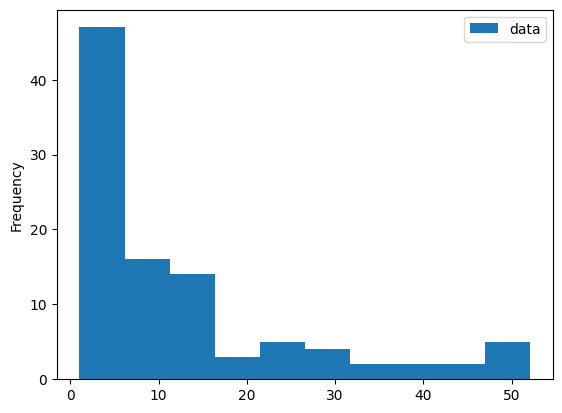

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

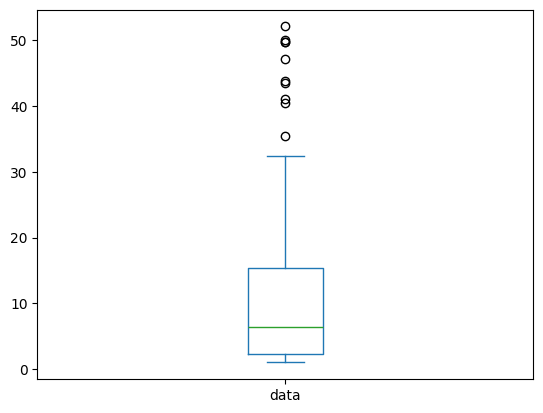

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
# set variables
df = pd.read_csv("data//auto//insurance_claims.csv")
print("First few rows of the dataset:")
print(df.head())
 
df.head()

dataset = df.copy()


First few rows of the dataset:
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_cla

In [5]:
dataset.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [6]:
# Summarize the datasets using info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
dataset.describe().transpose()

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
_c39                            0.0           NaN           NaN         NaN   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
_c39                                 NaN       NaN         NaN          NaN

In [8]:
# Delete control column: _c39
dataset.drop('_c39', axis=1, inplace=True)


In [9]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Check for duplicate values in inappropriate columns (e.g., unique identifiers)
duplicate_customer_ids = dataset["policy_number"].duplicated().sum()
print(f"Number of duplicate PolicyNumbers: {duplicate_customer_ids}")


Number of duplicate rows: 0
Number of duplicate PolicyNumbers: 0


In [10]:
# Remoing PolicyNumber column
dataset.drop("policy_number", axis=1, inplace=True)


In [11]:
# Compute mean, median, and mode
mean_values = dataset.mean(numeric_only=True)
median_values = dataset.median(numeric_only=True)
mode_values = dataset.mode().iloc[0]
 
# Combine mean, median, and mode into a single table
statistics_table = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})
print("Combined Statistics Table:\n", statistics_table)

Combined Statistics Table:
                                      Mean    Median                     Mode
age                          3.894800e+01      38.0                     43.0
authorities_contacted                 NaN       NaN                   Police
auto_make                             NaN       NaN                    Dodge
auto_model                            NaN       NaN                      RAM
auto_year                    2.005103e+03    2005.0                   1995.0
bodily_injuries              9.920000e-01       1.0                      0.0
capital-gains                2.512610e+04       0.0                      0.0
capital-loss                -2.679370e+04  -23250.0                      0.0
collision_type                        NaN       NaN           Rear Collision
fraud_reported                        NaN       NaN                        N
incident_city                         NaN       NaN              Springfield
incident_date                         NaN       

In [12]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 months_as_customer              0
age                             0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses           

In [13]:
# Handling missing values
dataset['authorities_contacted'] = dataset['authorities_contacted'].fillna('None')
print("Missing values in 'authorities_contacted' filled with 'None'.")

dataset.fillna(dataset.mean(numeric_only=True), inplace=True)
print("Missing values filled with column means.")



Missing values in 'authorities_contacted' filled with 'None'.
Missing values filled with column means.


Note: 
  - The dataset does not contain duplicates.

  - Column `authorities_contacted` has 91 missing values.

In [14]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['auto_make','insured_sex', 'insured_education_level']
df_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)
print("Categorical variables encoded.")
df_encoded.head()

Categorical variables encoded.


months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       2014-10-17           OH    250/500   
1                 228   42       2006-06-27           IN    250/500   
2                 134   29       2000-09-06           OH    100/300   
3                 256   41       1990-05-25           IL    250/500   
4                 228   44       2014-06-06           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_occupation  ... auto_make_Suburu auto_make_Toyota  \
0       craft-repair  ...            False            False   
1  machine-op-inspct  ...            False            False   
2              sales  ...            False            False   
3       armed-forces  ...            False            False   
4              sales  ...            False            False   

   auto_make_Volkswagen  insured_sex_MALE insured_education_level_College  \
0                 False              True                           False   
1                 False              True                           False   
2                 False             False                           False   
3                 False             False                           False   
4                 False              True                           False   

  insured_education_level_High School insured_education_level_JD  \
0                               False                      False   
1                               False                      False   
2                               False                      False   
3                               False                      False   
4                               False                      False   

  insured_education_level_MD insured_education_level_Masters  \
0                       True                           False   
1                       True                           False   
2                      False                           False   
3                      False                           False   
4                      False                           False   

  insured_education_level_PhD  
0                       False  
1                       False  
2                        True  
3                        True  
4                       False  

[5 rows x 55 columns]

In [15]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   months_as_customer                   1000 non-null   int64  
 1   age                                  1000 non-null   int64  
 2   policy_bind_date                     1000 non-null   object 
 3   policy_state                         1000 non-null   object 
 4   policy_csl                           1000 non-null   object 
 5   policy_deductable                    1000 non-null   int64  
 6   policy_annual_premium                1000 non-null   float64
 7   umbrella_limit                       1000 non-null   int64  
 8   insured_zip                          1000 non-null   int64  
 9   insured_occupation                   1000 non-null   object 
 10  insured_hobbies                      1000 non-null   object 
 11  insured_relationship           

In [16]:
# Convert boolean columns to integer
bool_cols = df_encoded.select_dtypes(include=["bool"]).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   months_as_customer                   1000 non-null   int64  
 1   age                                  1000 non-null   int64  
 2   policy_bind_date                     1000 non-null   object 
 3   policy_state                         1000 non-null   object 
 4   policy_csl                           1000 non-null   object 
 5   policy_deductable                    1000 non-null   int64  
 6   policy_annual_premium                1000 non-null   float64
 7   umbrella_limit                       1000 non-null   int64  
 8   insured_zip                          1000 non-null   int64  
 9   insured_occupation                   1000 non-null   object 
 10  insured_hobbies                      1000 non-null   object 
 11  insured_relationship           

In [17]:
# Check for class imbalance in categorical columns
for col in categorical_columns:
    print(f"Class distribution for {col}:\n", dataset[col].value_counts())


Class distribution for auto_make:
 auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64
Class distribution for insured_sex:
 insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
Class distribution for insured_education_level:
 insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64


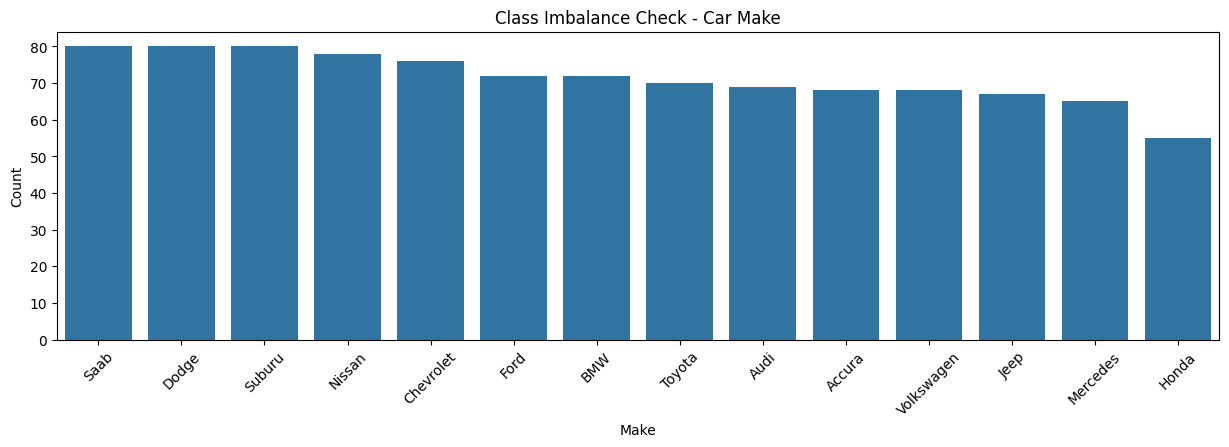

In [41]:
# "auto_make", 'insured_sex', 'insured_education_level'
# Display class imbalance
df_categorical = pd.DataFrame({
    "Make": dataset["auto_make"].value_counts().index,
    "Count": dataset["auto_make"].value_counts().values
})

plt.figure(figsize=(15, 4))
sns.barplot(x="Make", y="Count", data=df_categorical)
plt.title("Class Imbalance Check - Car Make")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

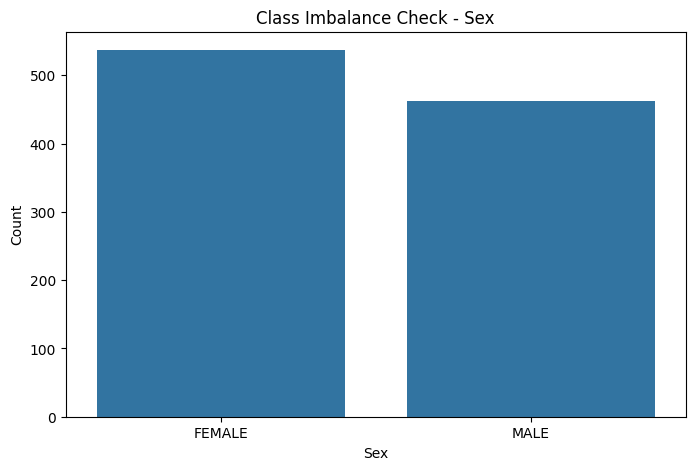

In [19]:
# "auto_make", 'insured_sex', 'insured_education_level'
# Display class imbalance in Sex
df_gender = pd.DataFrame({
    "Sex": dataset["insured_sex"].value_counts().index,
    "Count": dataset["insured_sex"].value_counts().values
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y="Count", data=df_gender)
plt.title("Class Imbalance Check - Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


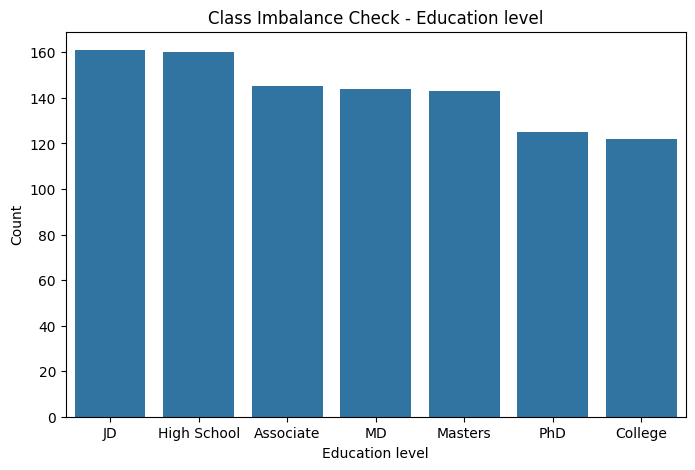

In [20]:
# "auto_make", 'insured_sex', 'insured_education_level'
# Display class imbalance in Sex
df_gender = pd.DataFrame({
    "Education level": dataset['insured_education_level'].value_counts().index,
    "Count": dataset['insured_education_level'].value_counts().values
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Education level", y="Count", data=df_gender)
plt.title("Class Imbalance Check - Education level")
plt.xlabel("Education level")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='age', ylabel='Count'>

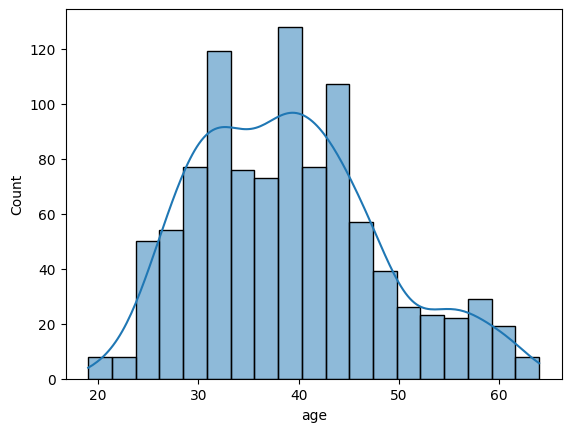

In [21]:

# KDE plot of Age
sns.histplot(dataset["age"], kde = True)

<Axes: xlabel='incident_severity', ylabel='Count'>

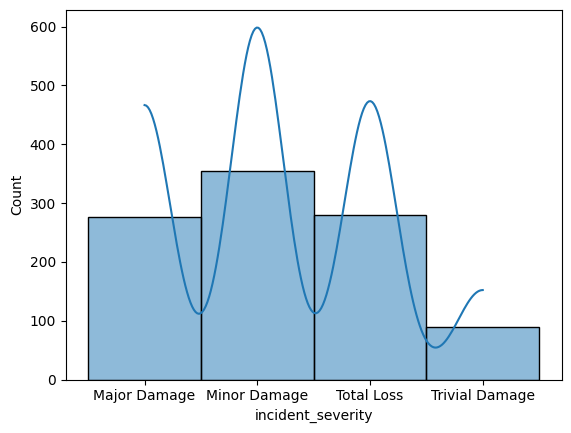

In [22]:
# KDE plot of Fault
sns.histplot(dataset["incident_severity"], kde = True)

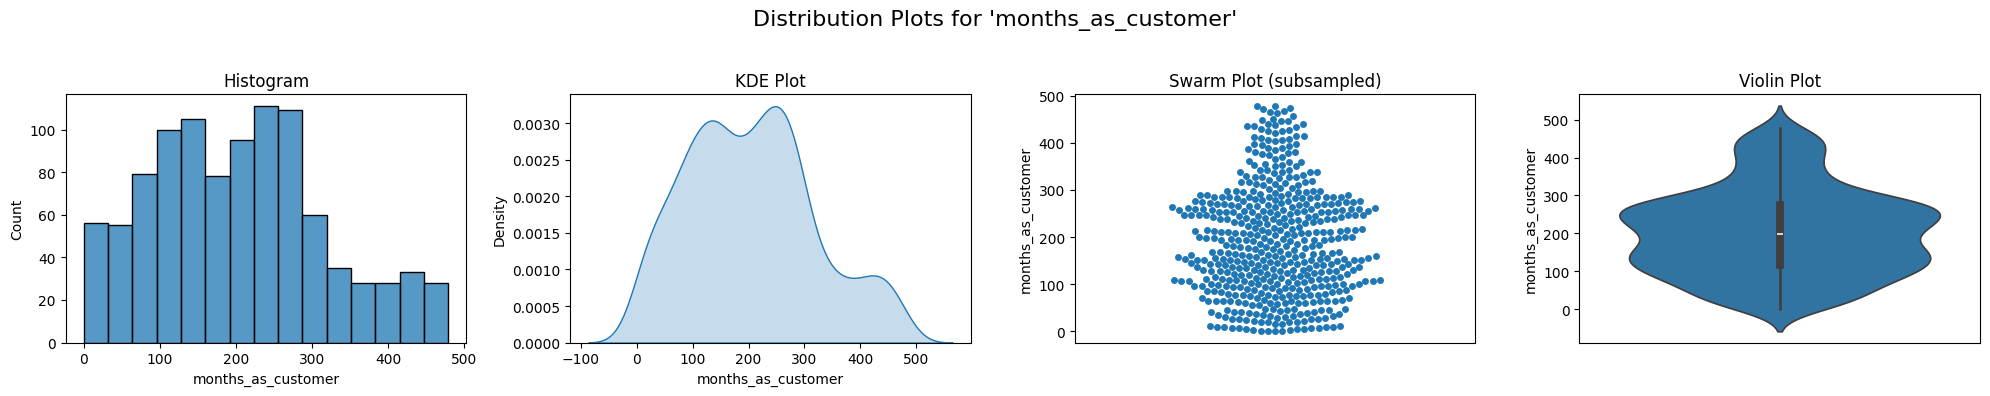

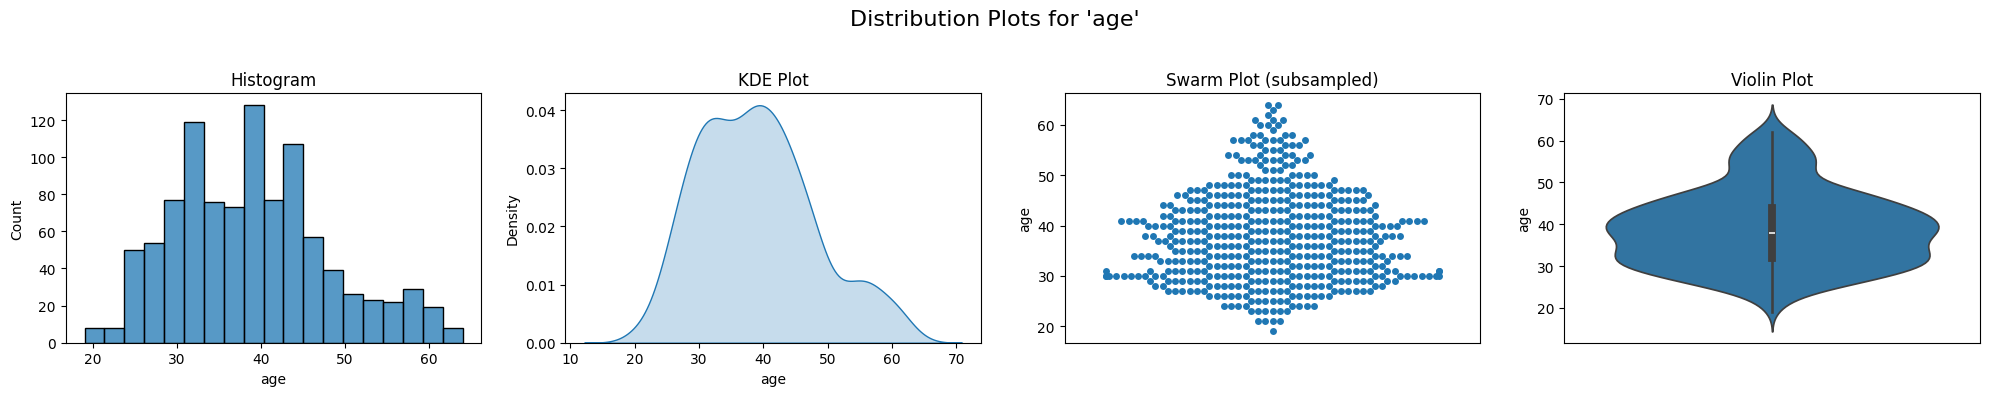

m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


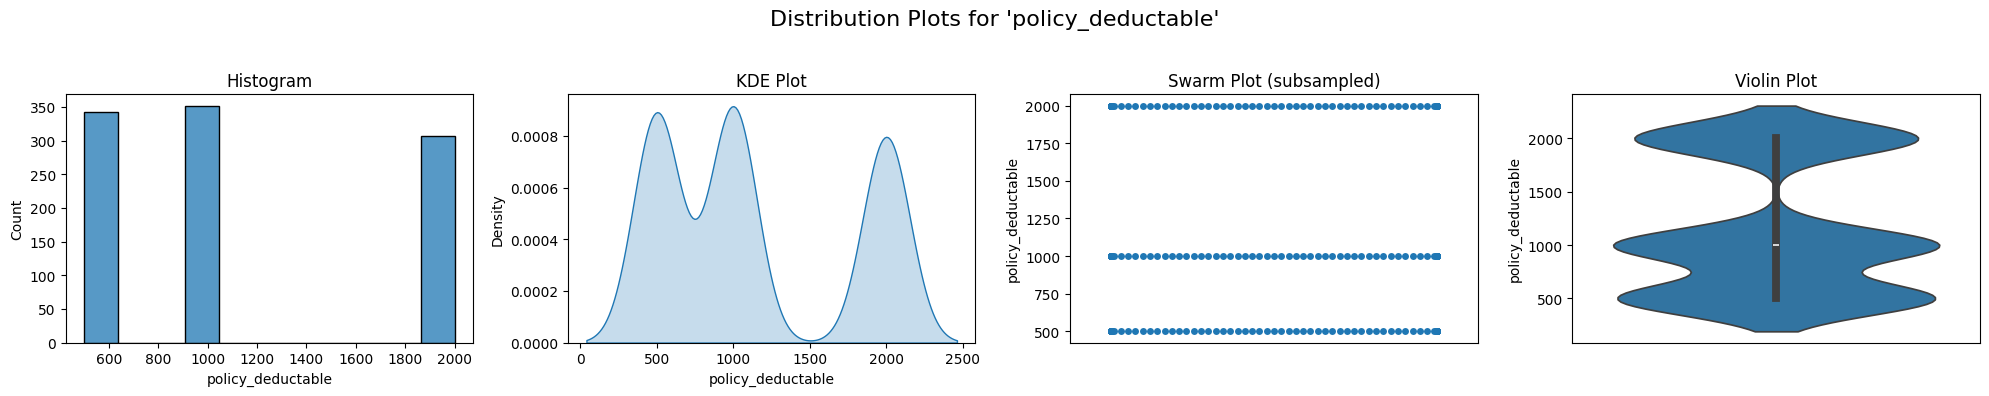

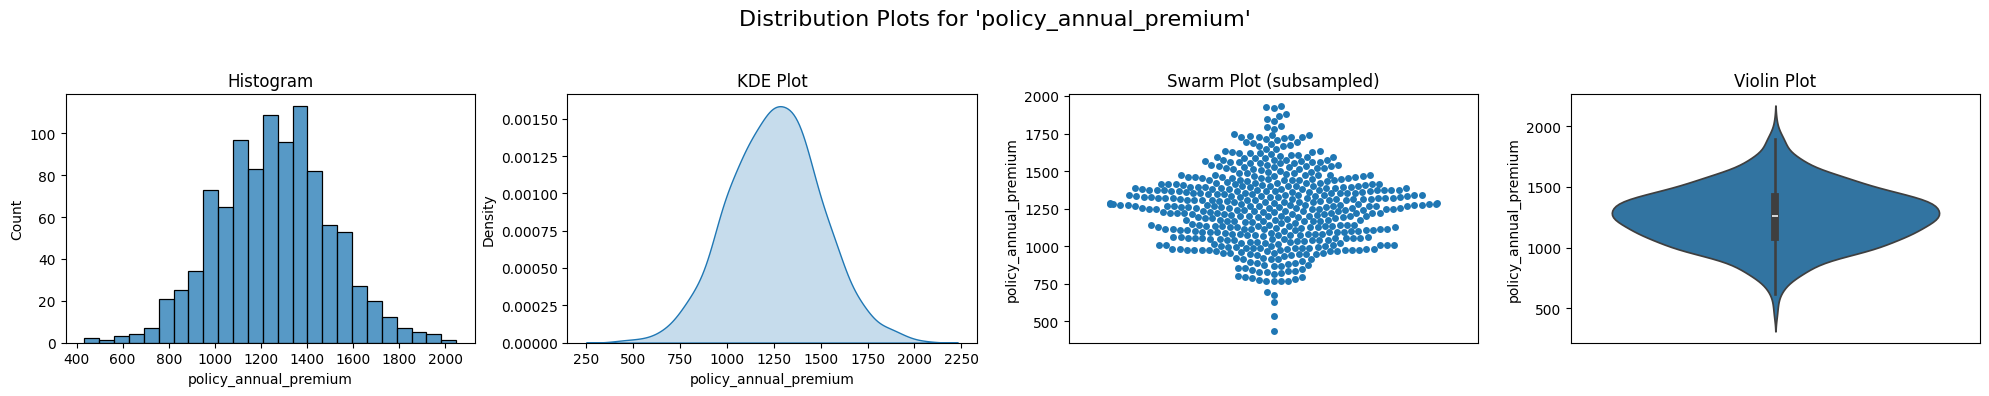

m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


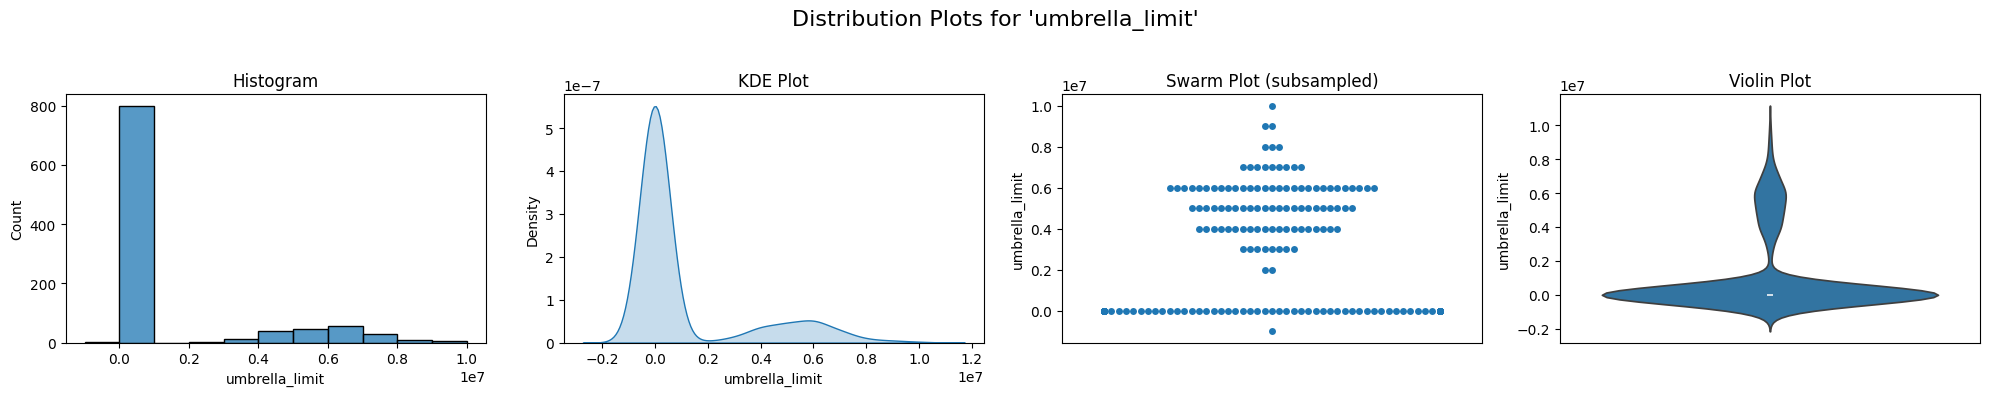

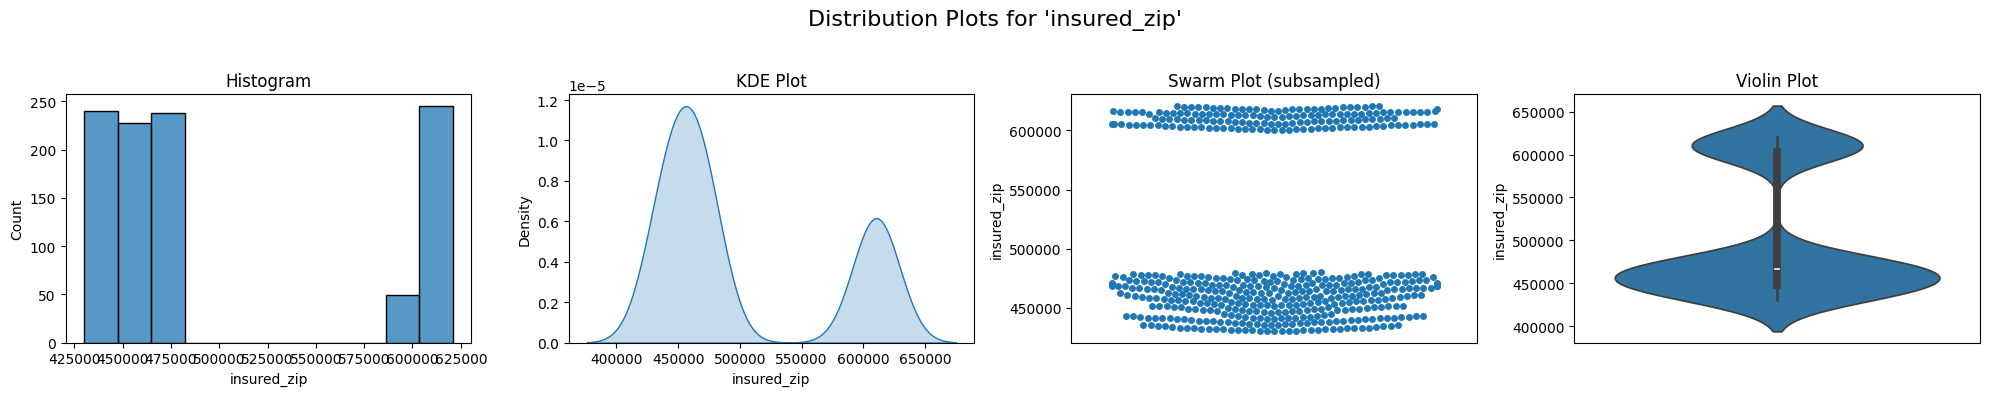

m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


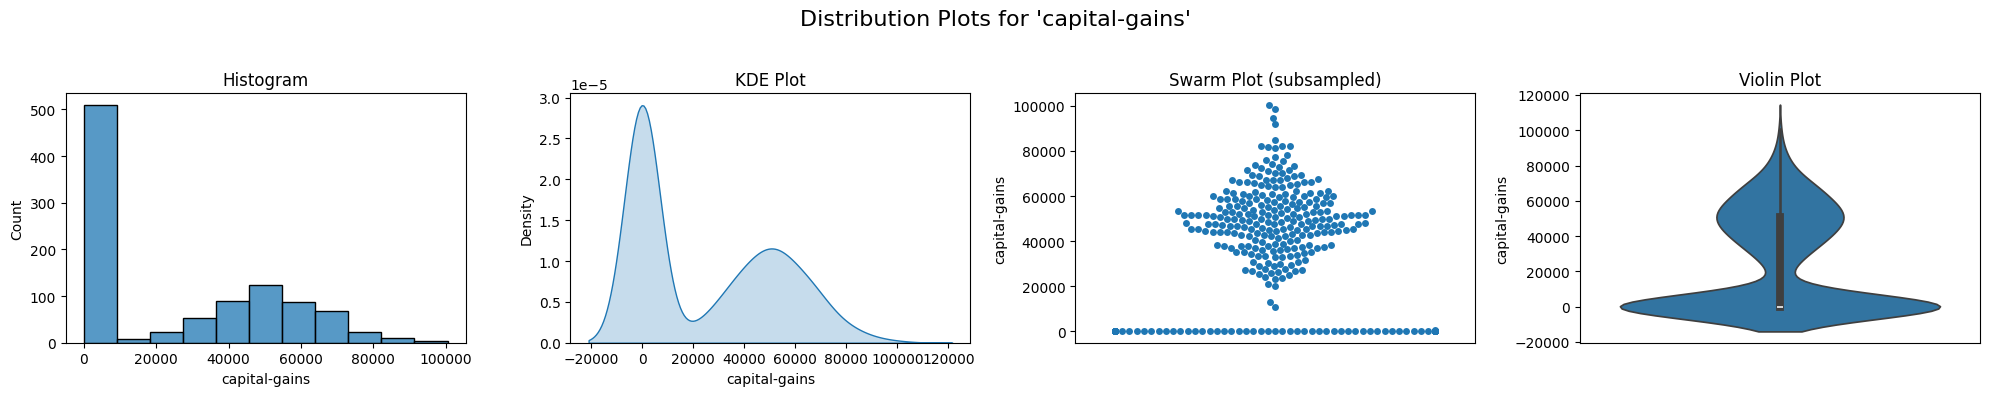

m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


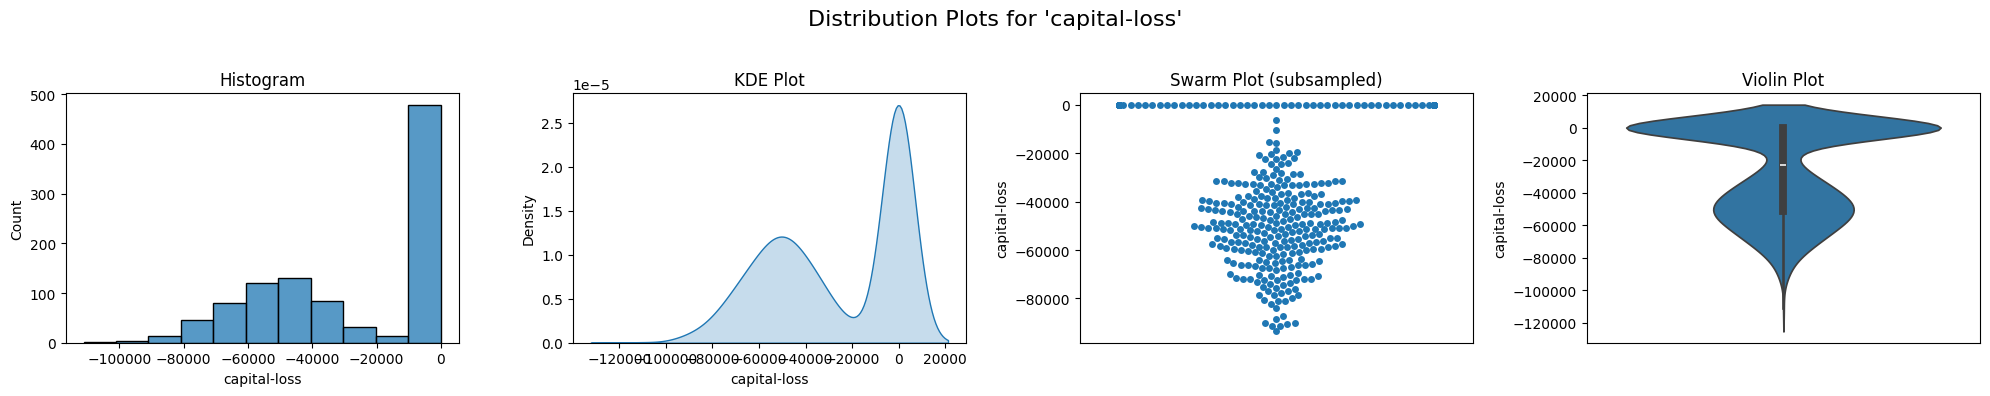

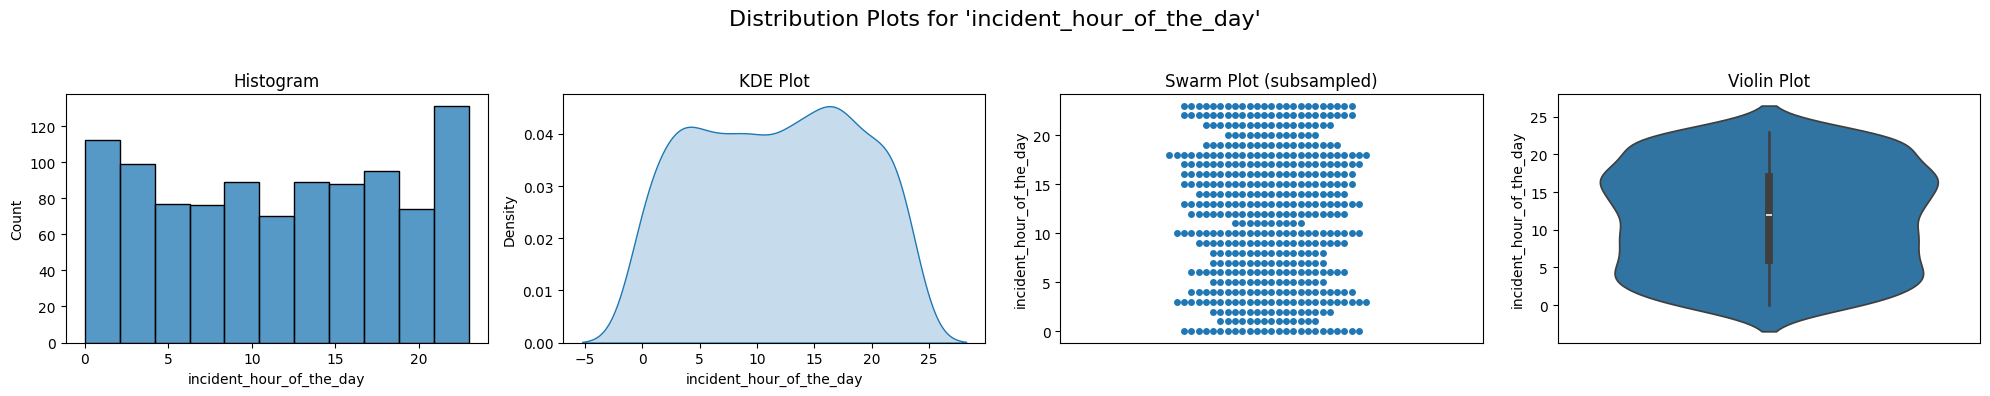

m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


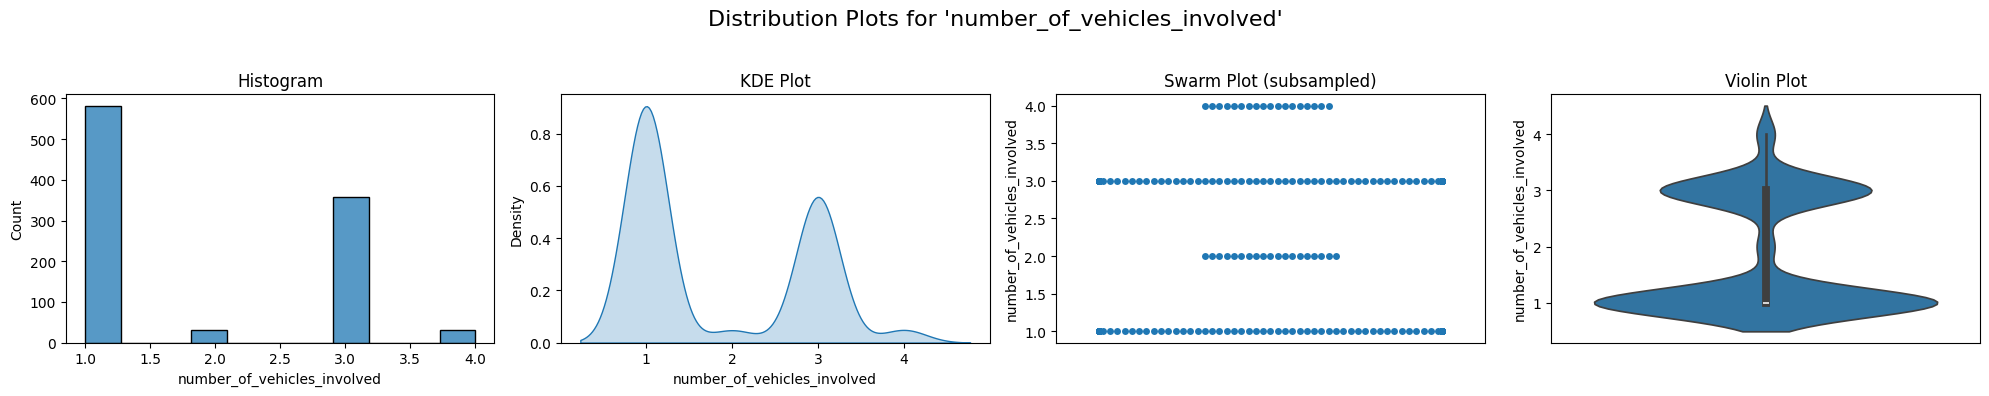

m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


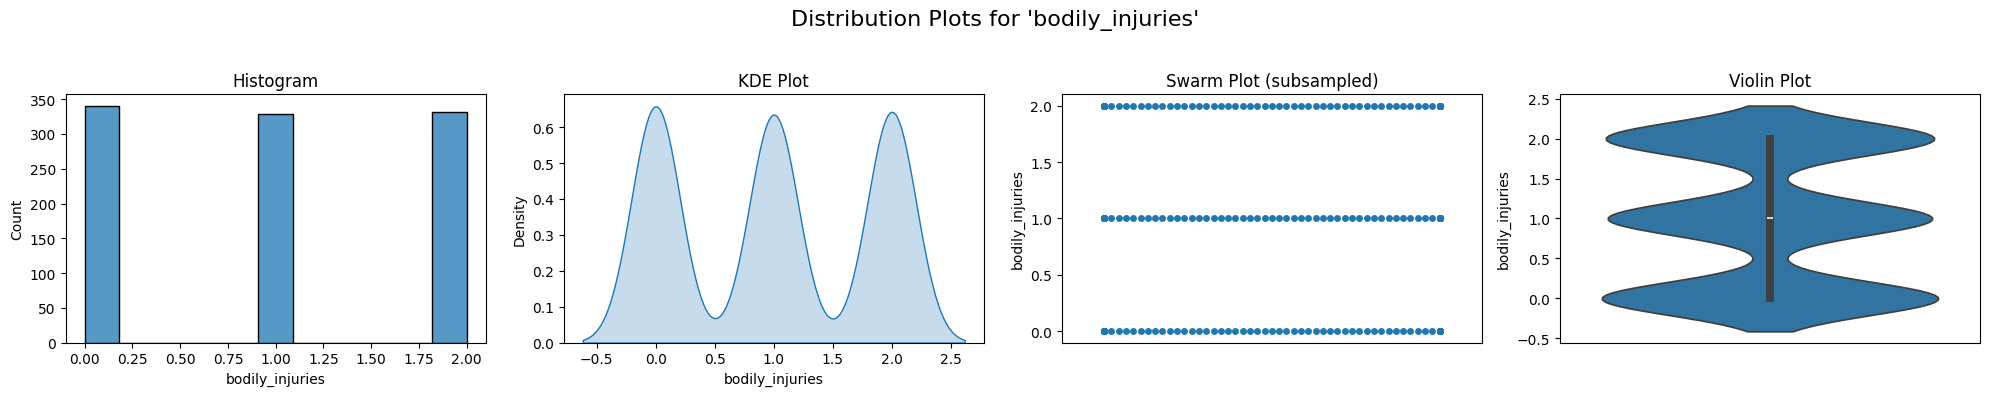

m:\Projects\BU\2025-spring-B2\.venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


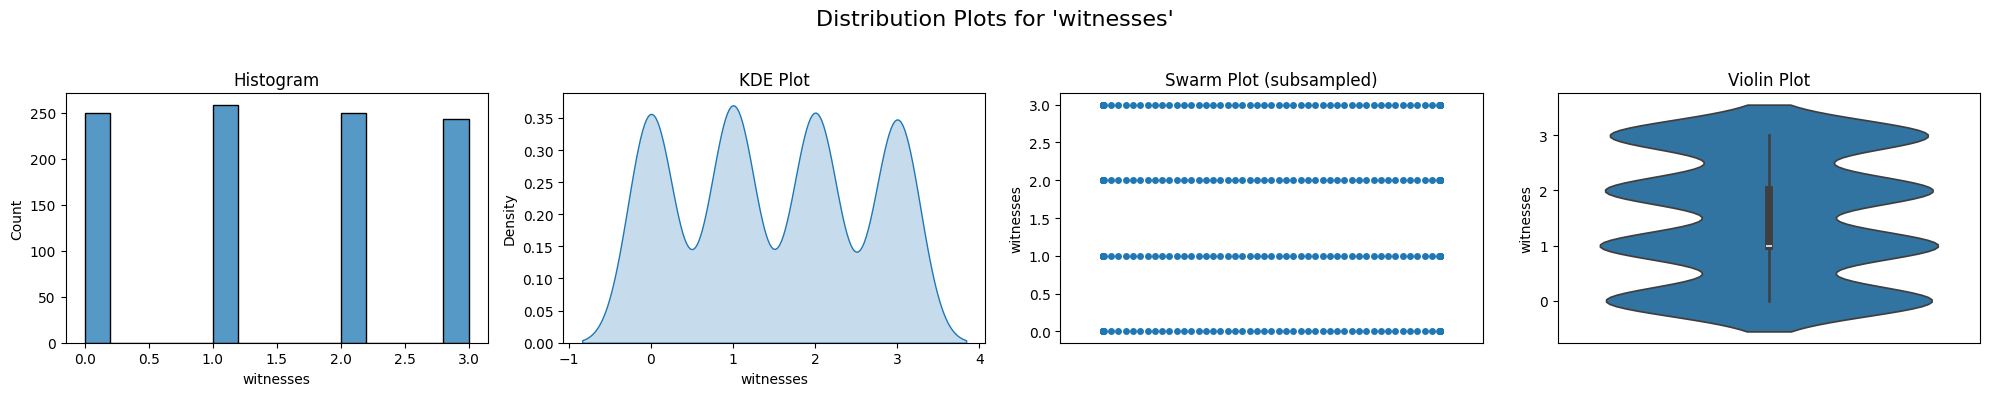

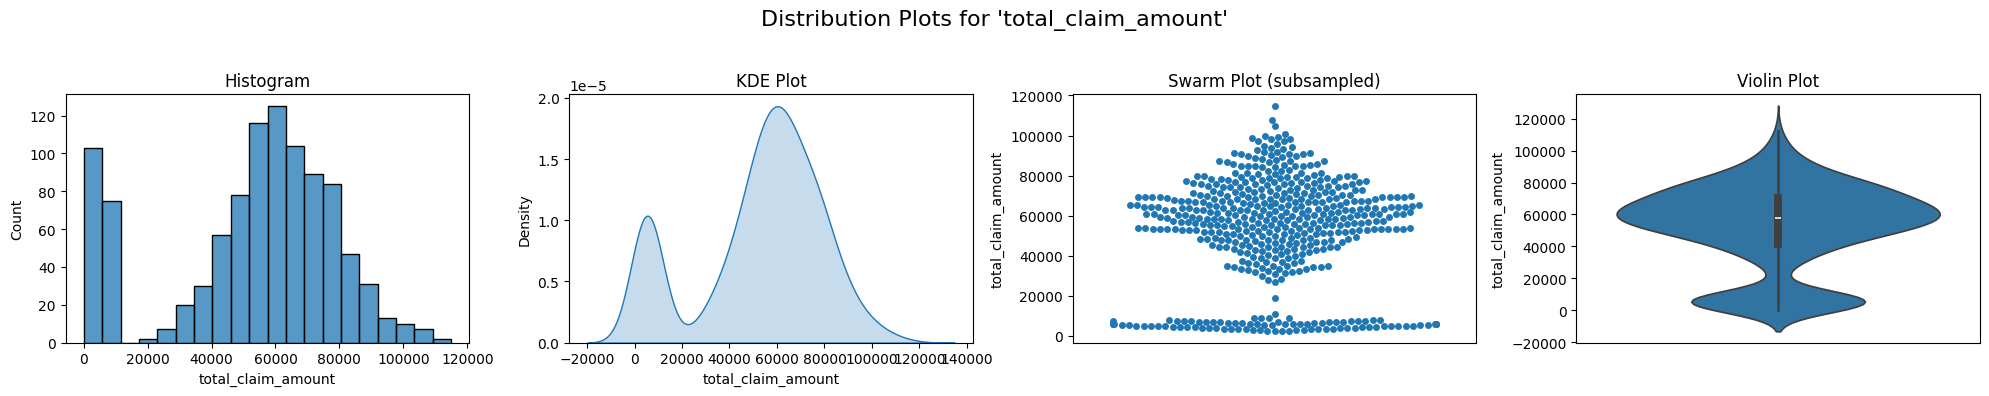

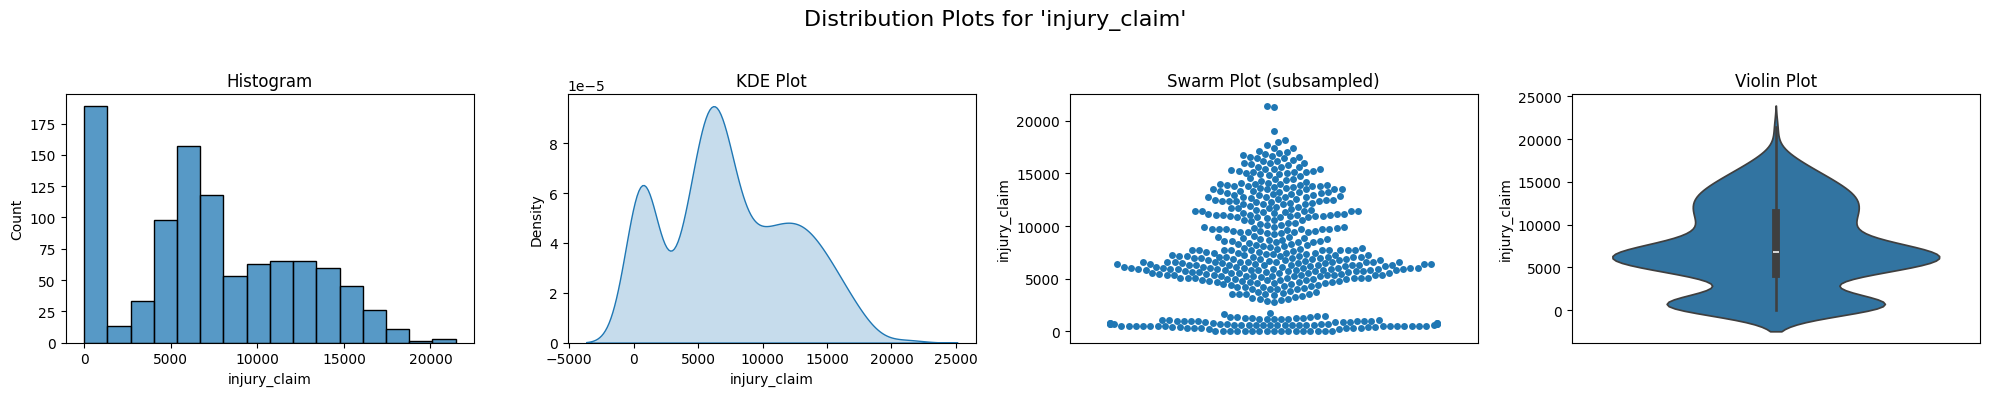

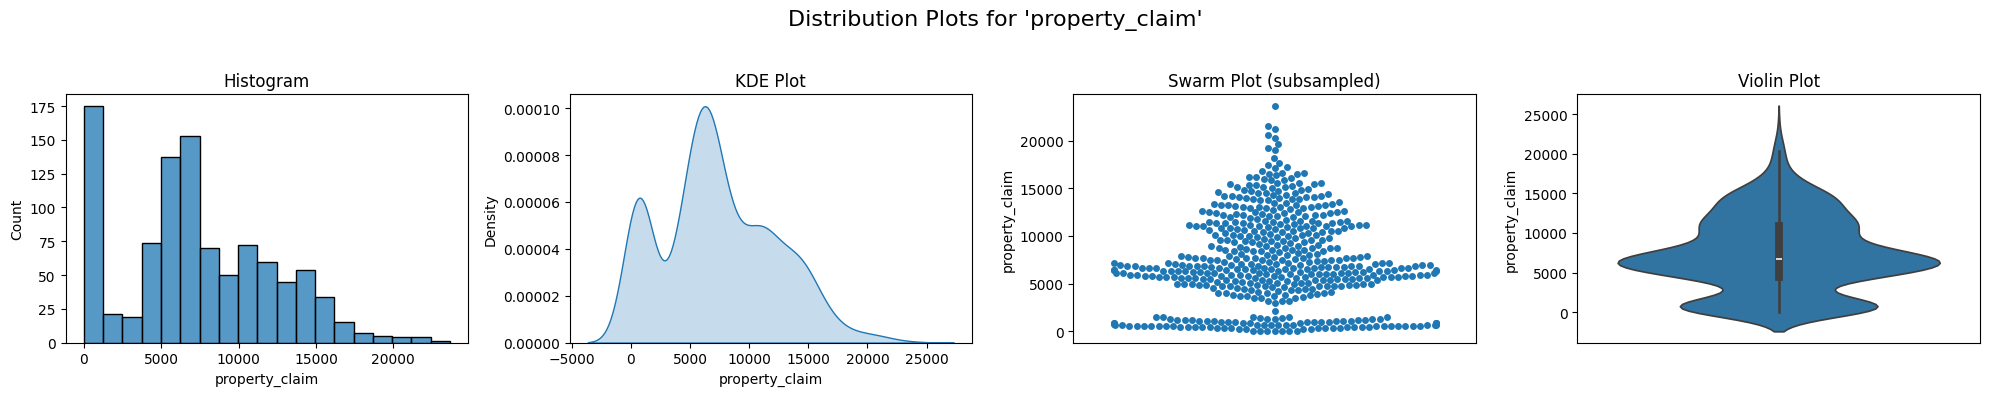

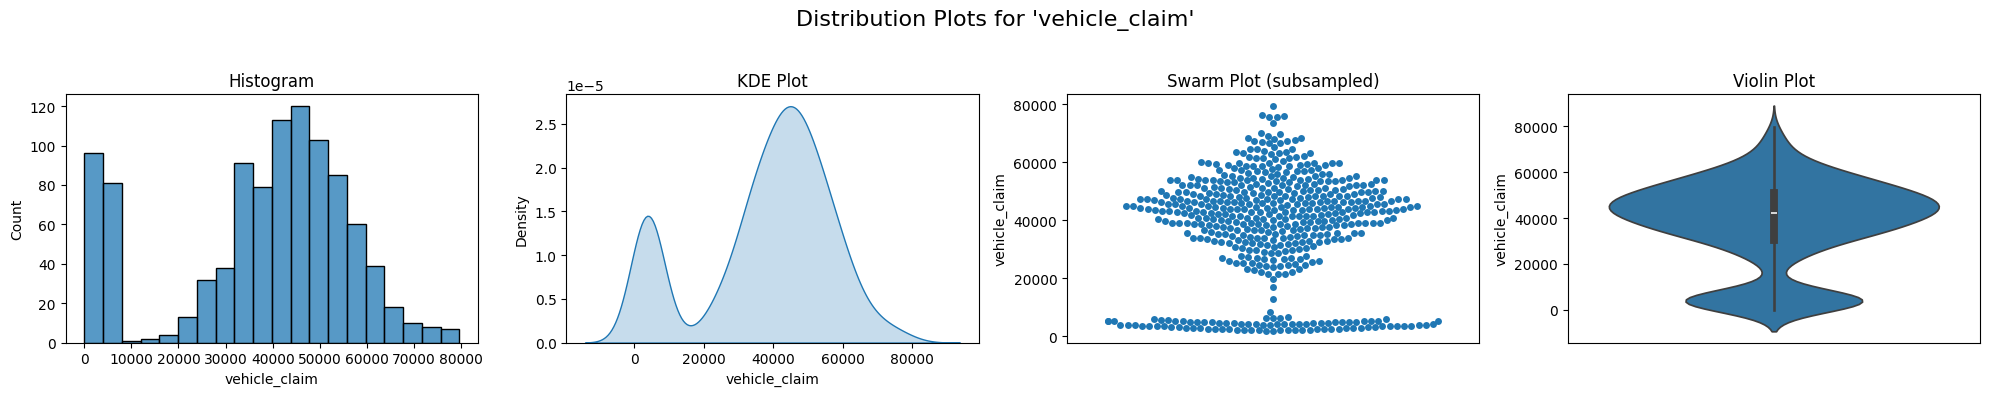

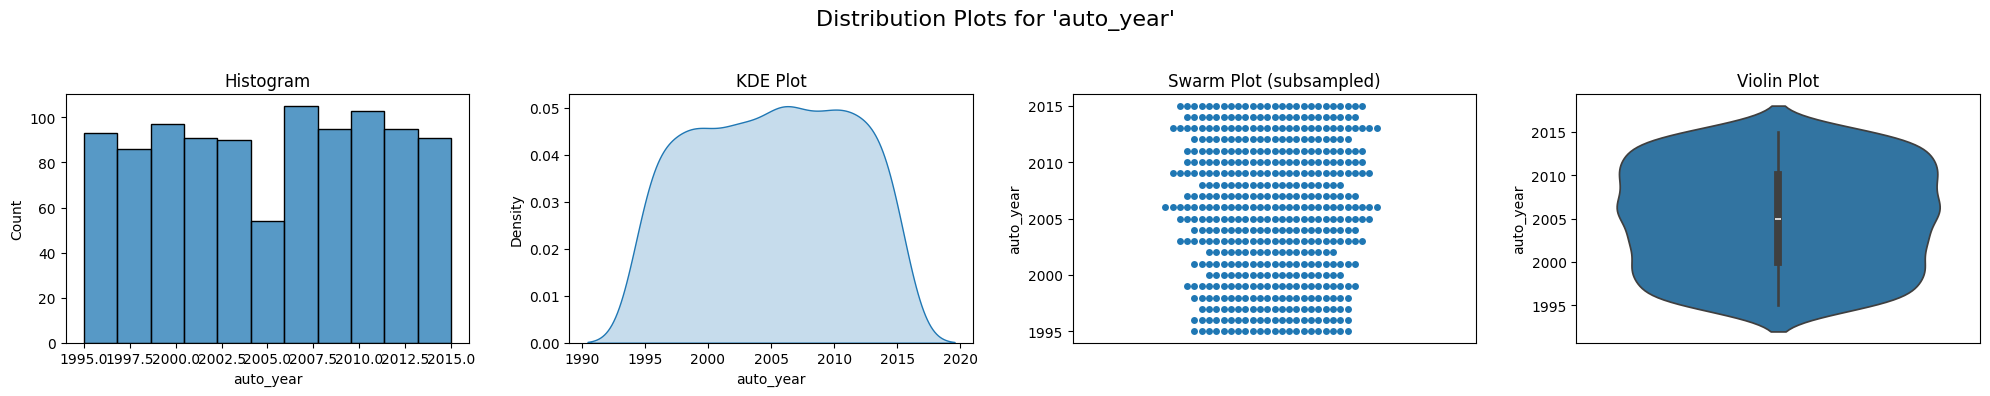

In [23]:
# Select only numeric columns for plotting
numeric_columns = dataset.select_dtypes(include=['number','int64']).columns

# Loop through each numeric column and create the plots
for col in numeric_columns:
    # Create a figure with 4 subplots in one row
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    fig.suptitle(f"Distribution Plots for '{col}'", fontsize=16)
    
    # Histogram Plot
    sns.histplot(dataset[col], ax=axes[0], kde=False)
    axes[0].set_title("Histogram")
    
    # KDE Plot
    sns.kdeplot(dataset[col], ax=axes[1], fill=True)
    axes[1].set_title("KDE Plot")
    
    # Swarm Plot with Subsampling
    # Subsample to a maximum of 500 data points to reduce computation time
    sample_size = min(500, len(dataset))
    sample_data = dataset[col].sample(n=sample_size, random_state=42)
    sns.swarmplot(x=[0]*len(sample_data), y=sample_data, ax=axes[2])
    axes[2].set_title("Swarm Plot (subsampled)")
    axes[2].set_xlabel("")
    axes[2].set_xticks([])
    
    # Violin Plot
    sns.violinplot(x=[0]*len(dataset), y=dataset[col], ax=axes[3])
    axes[3].set_title("Violin Plot")
    axes[3].set_xlabel("")
    axes[3].set_xticks([])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

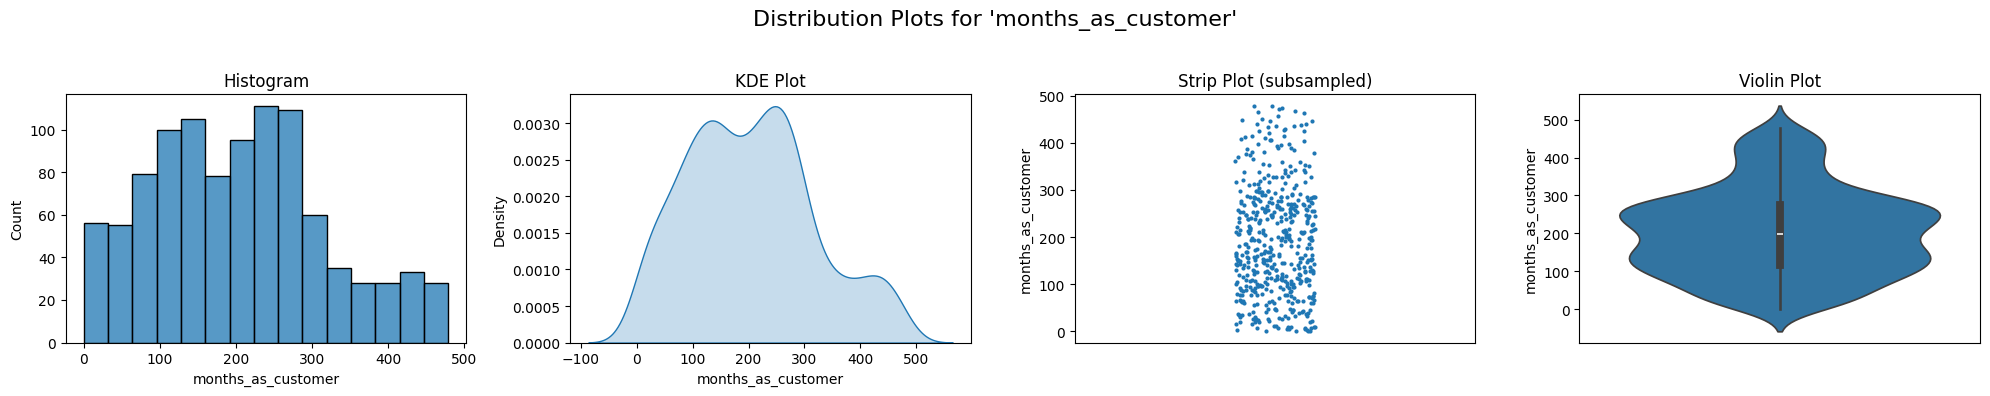

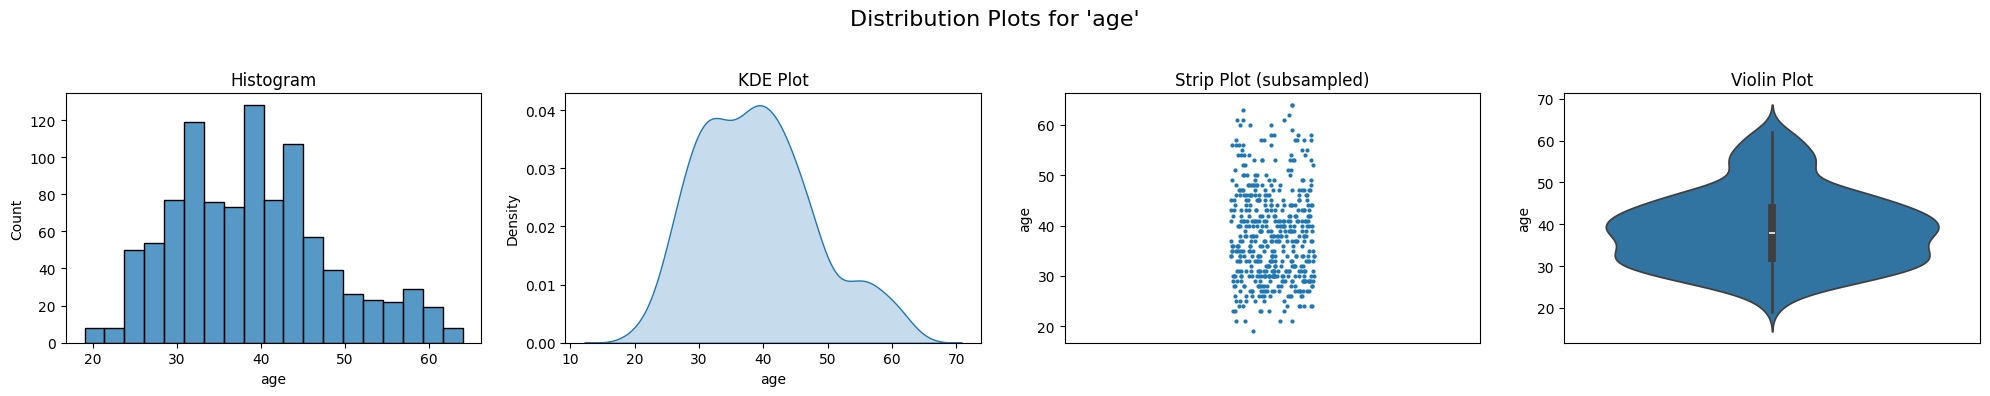

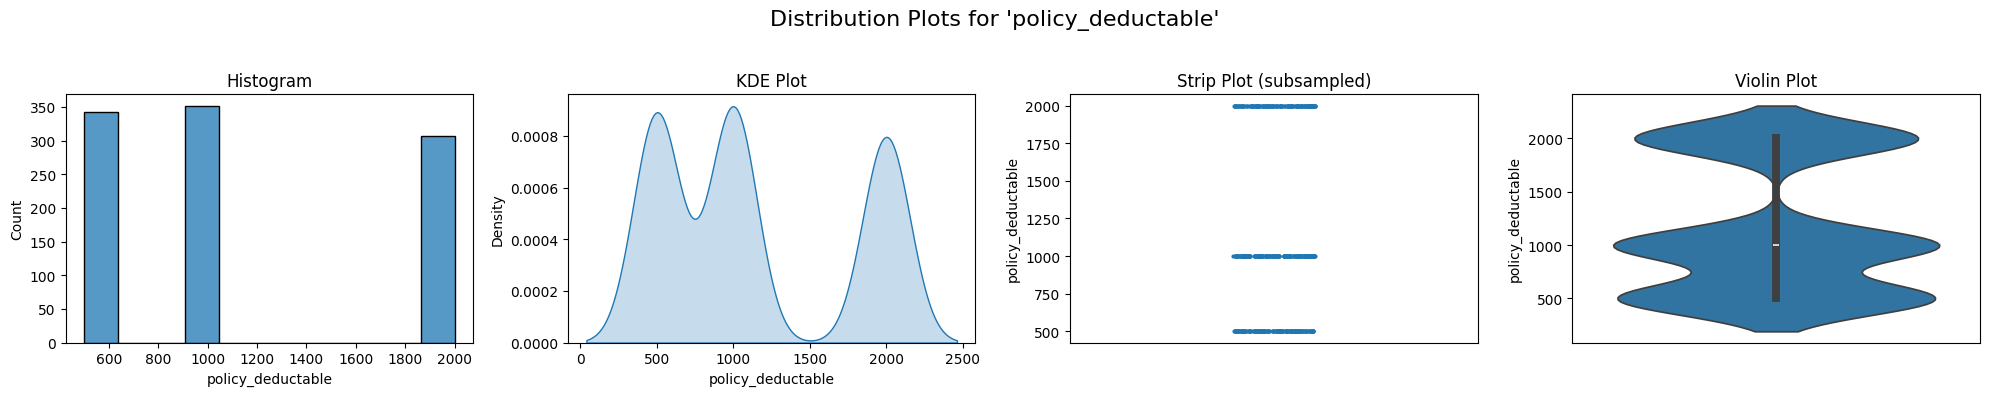

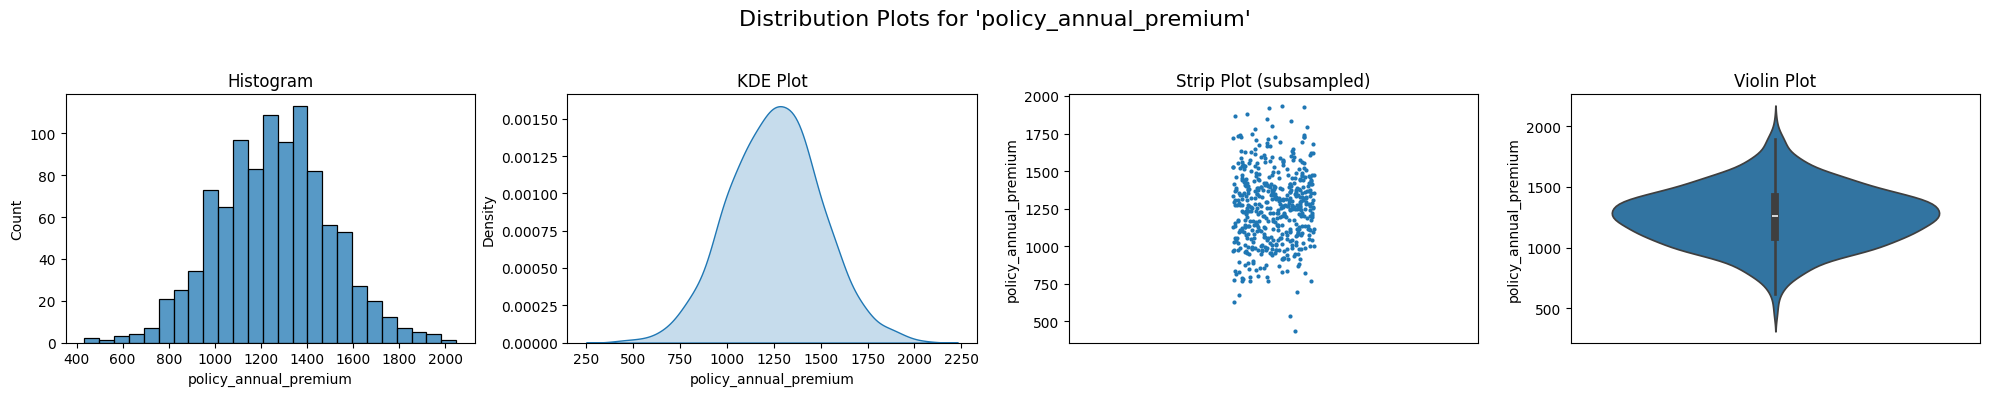

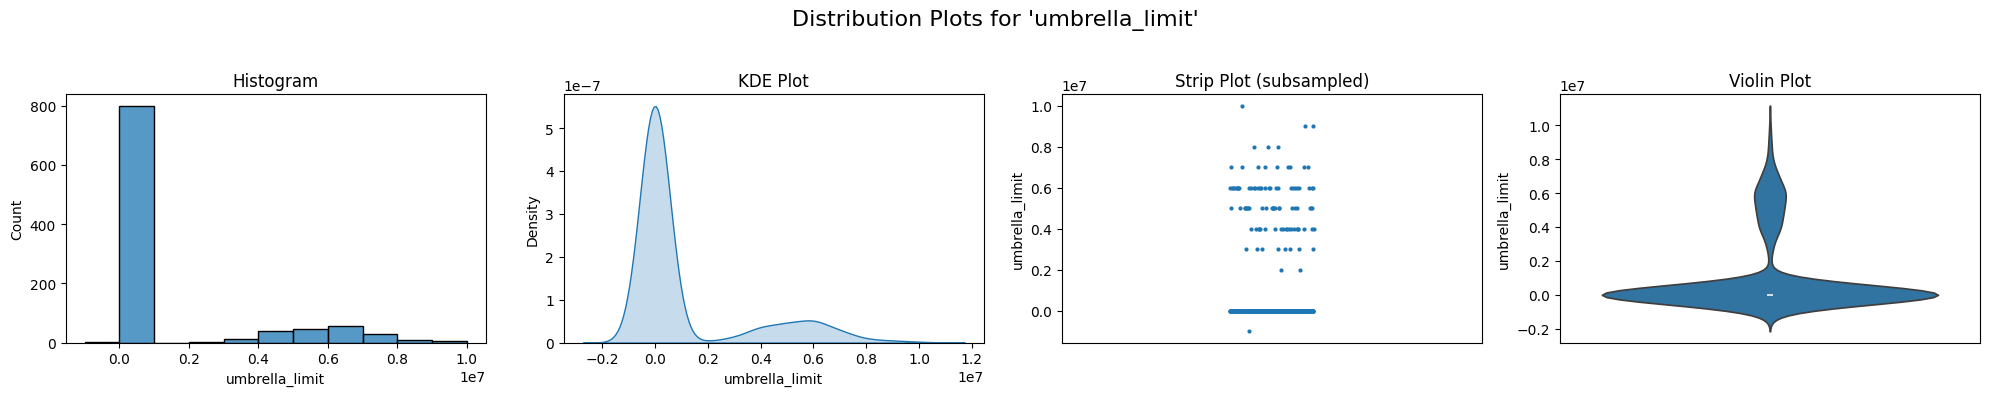

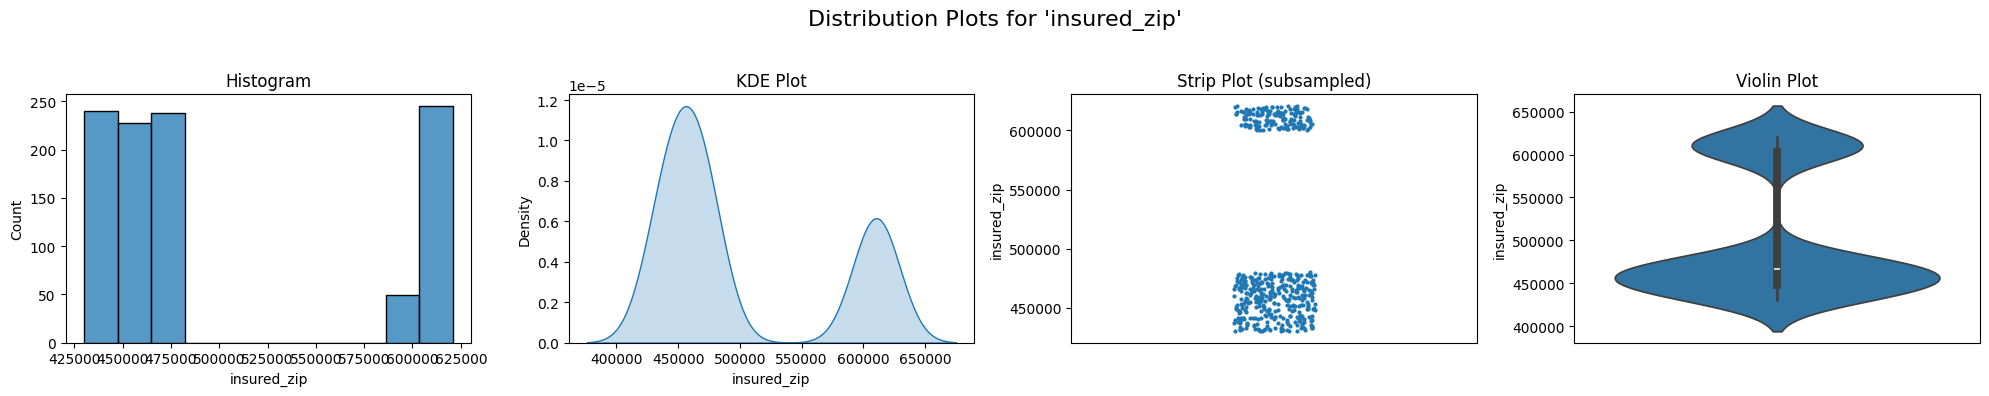

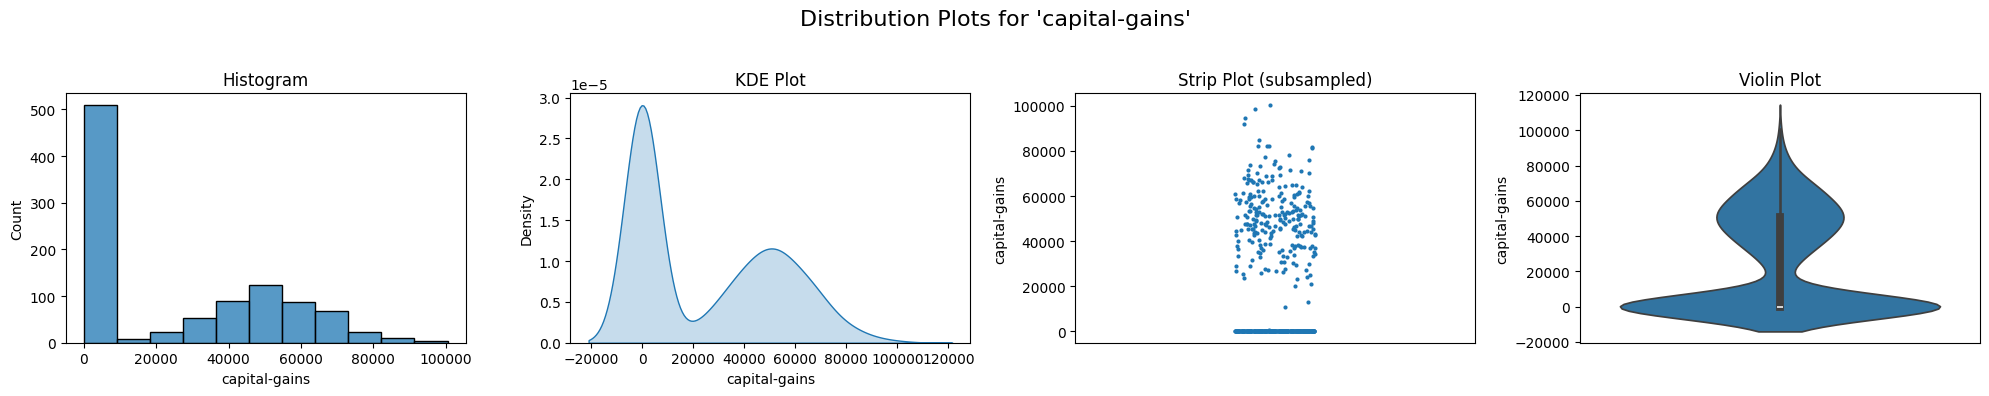

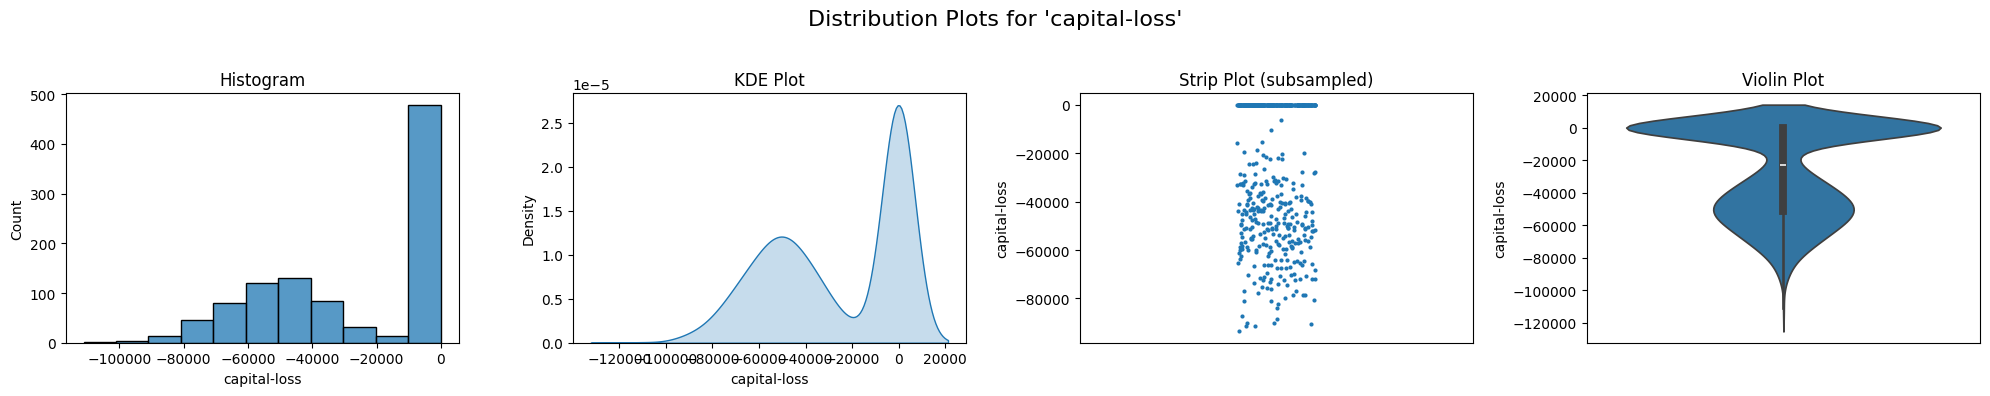

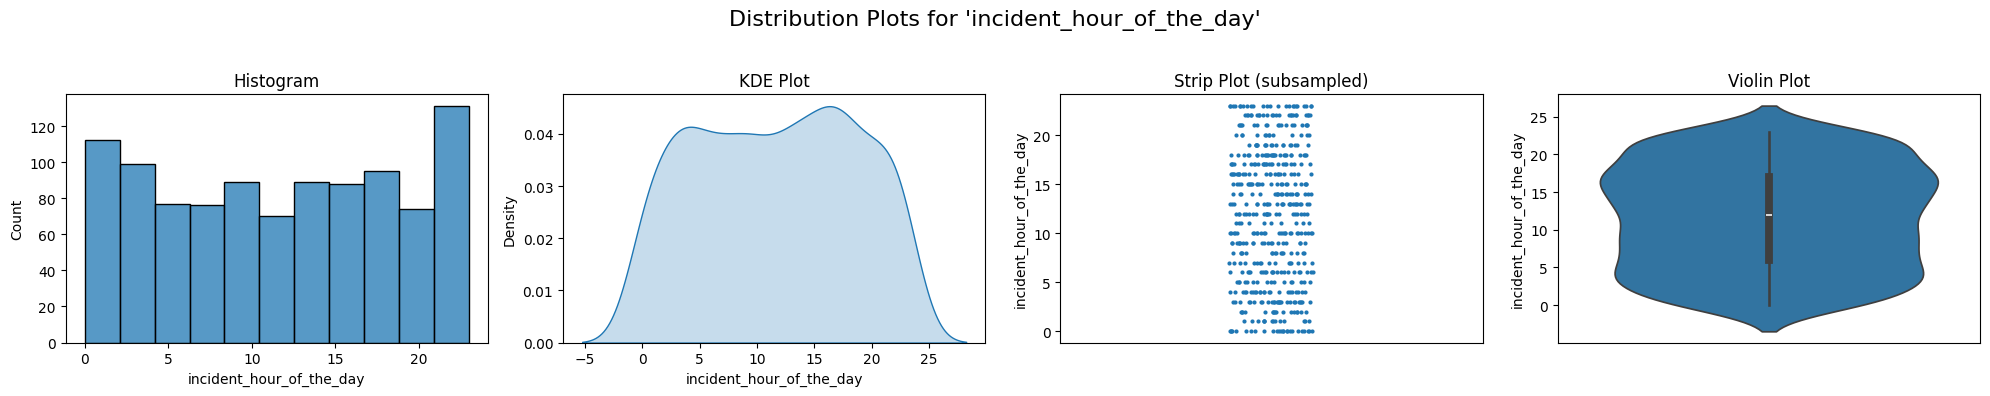

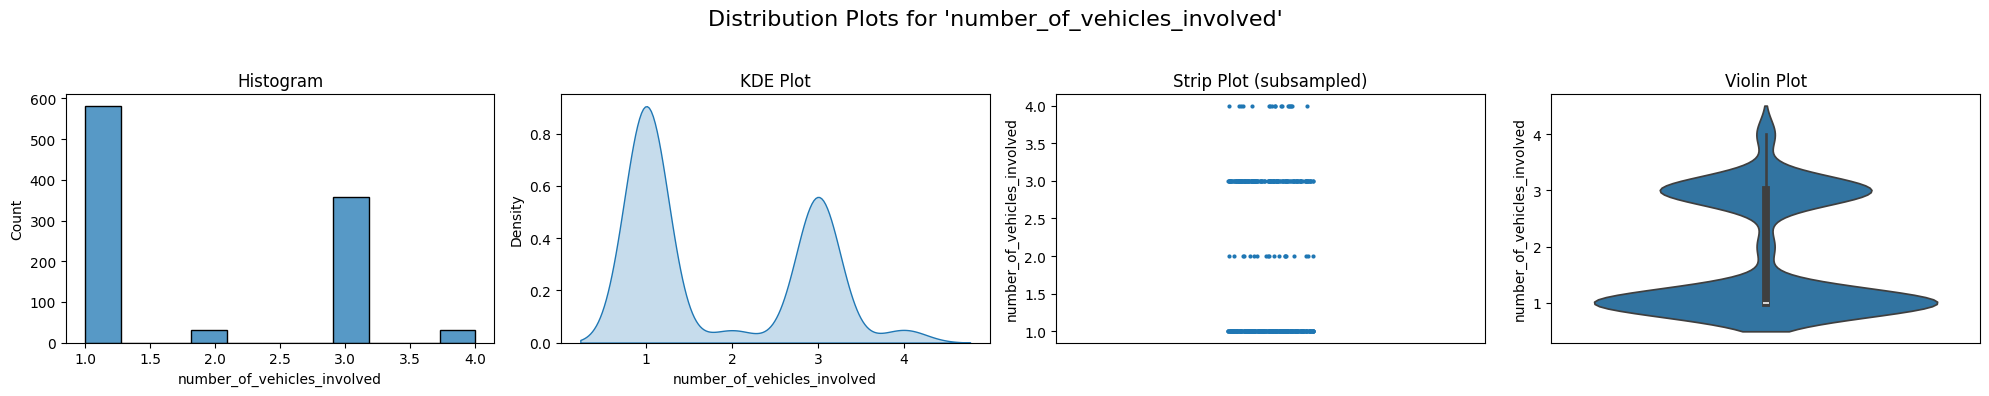

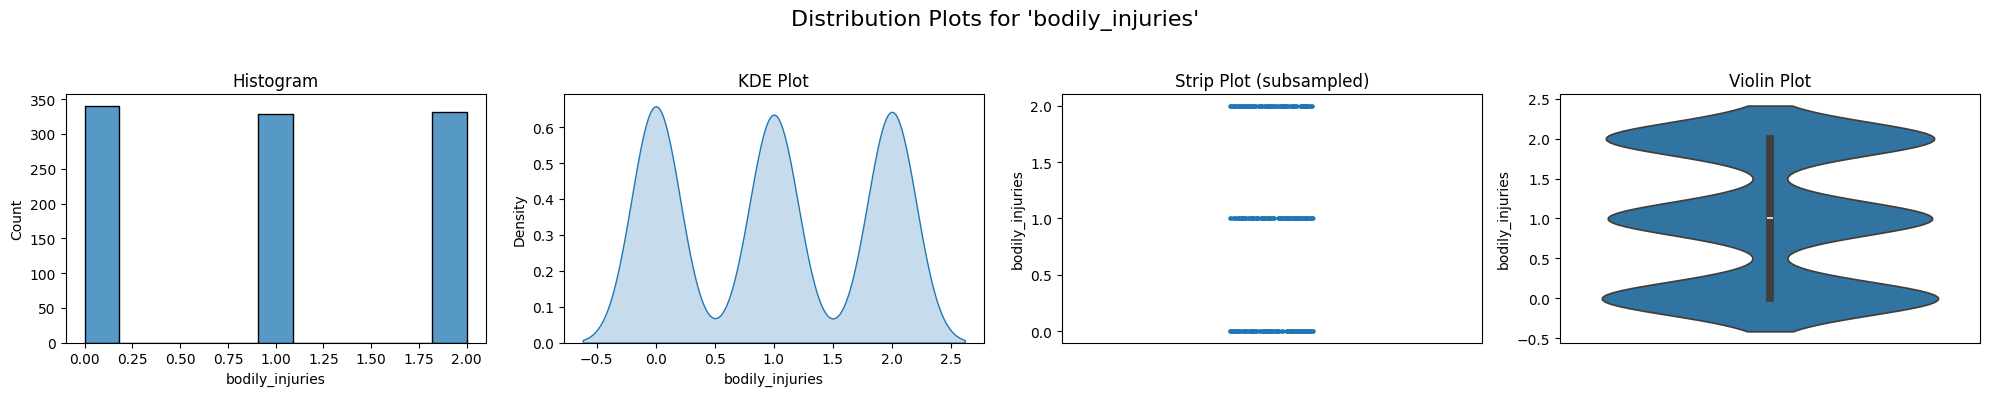

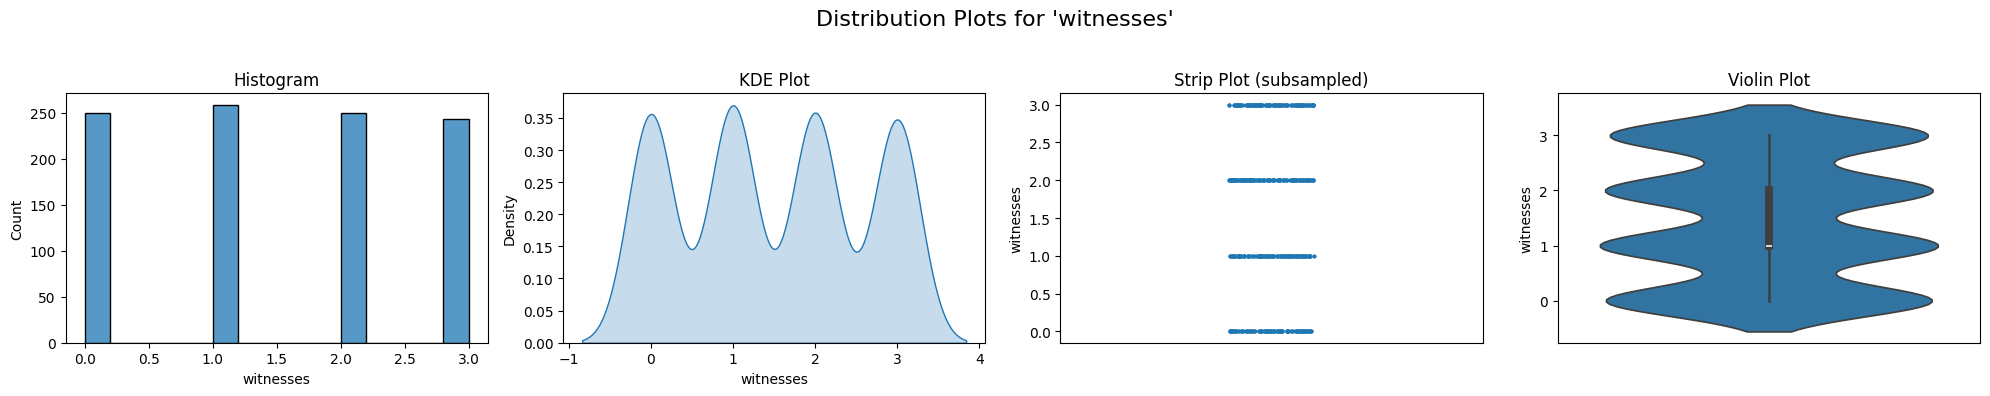

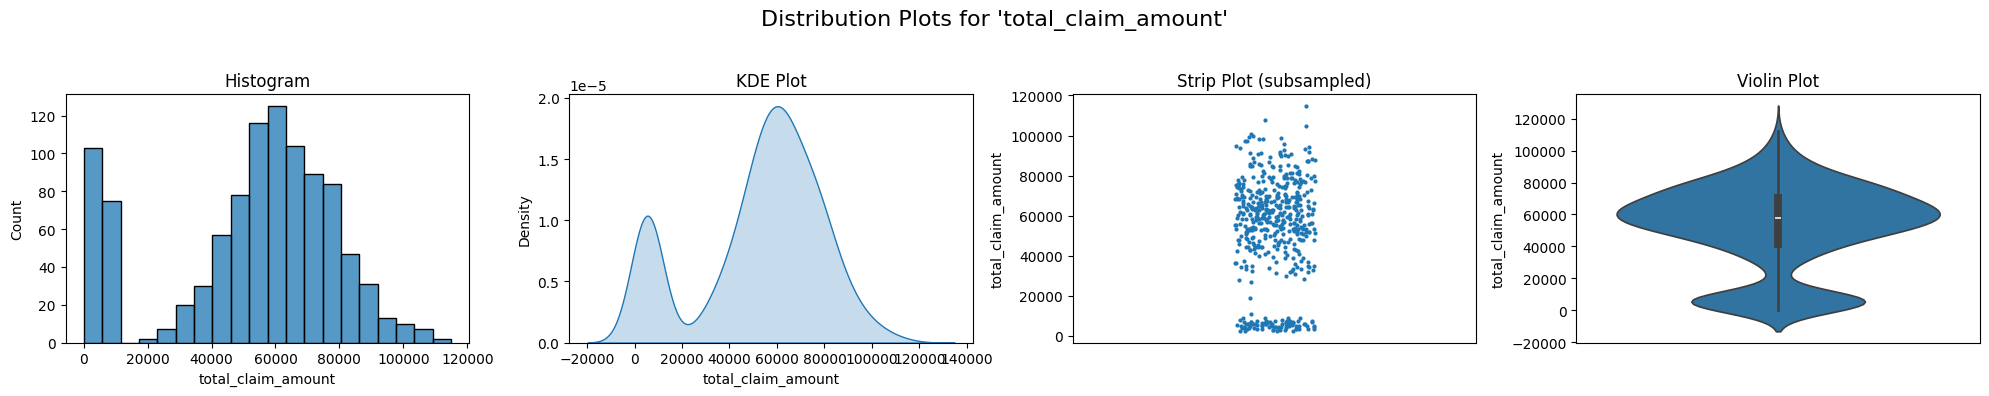

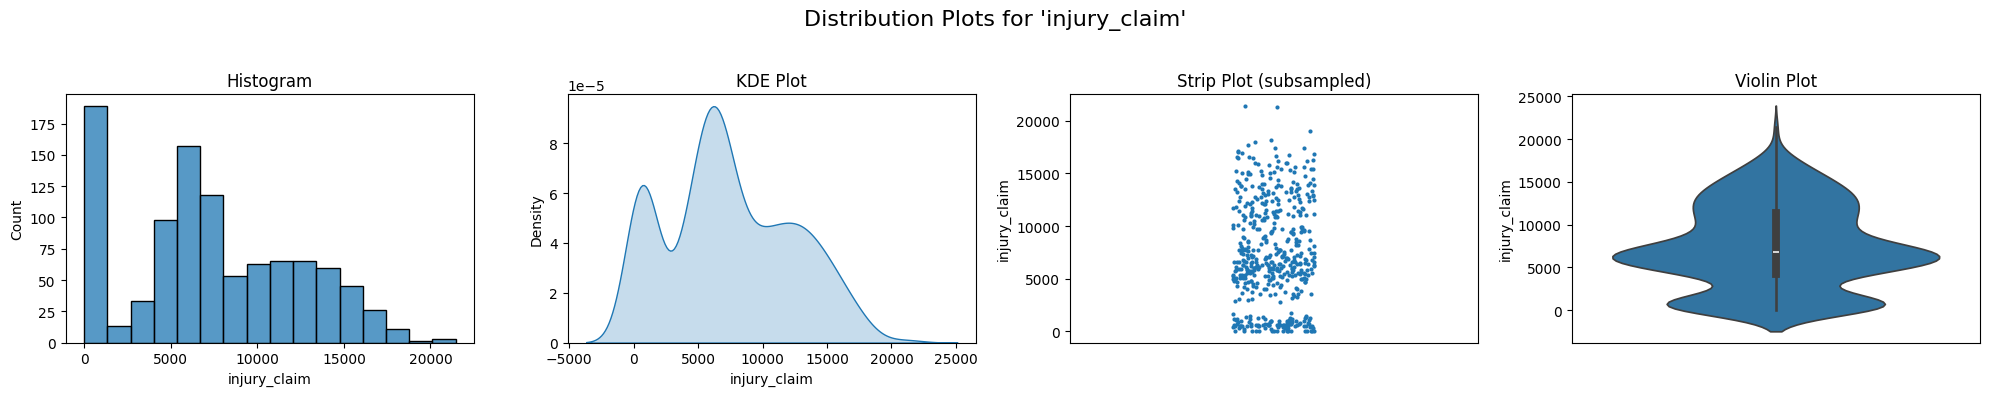

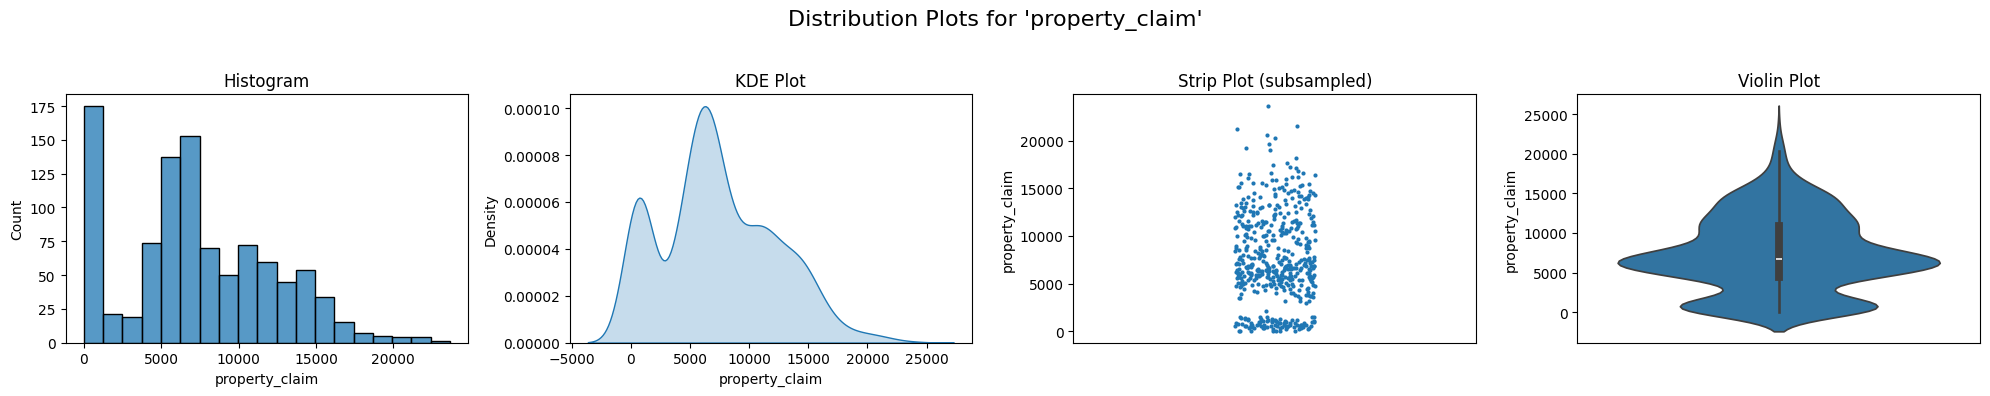

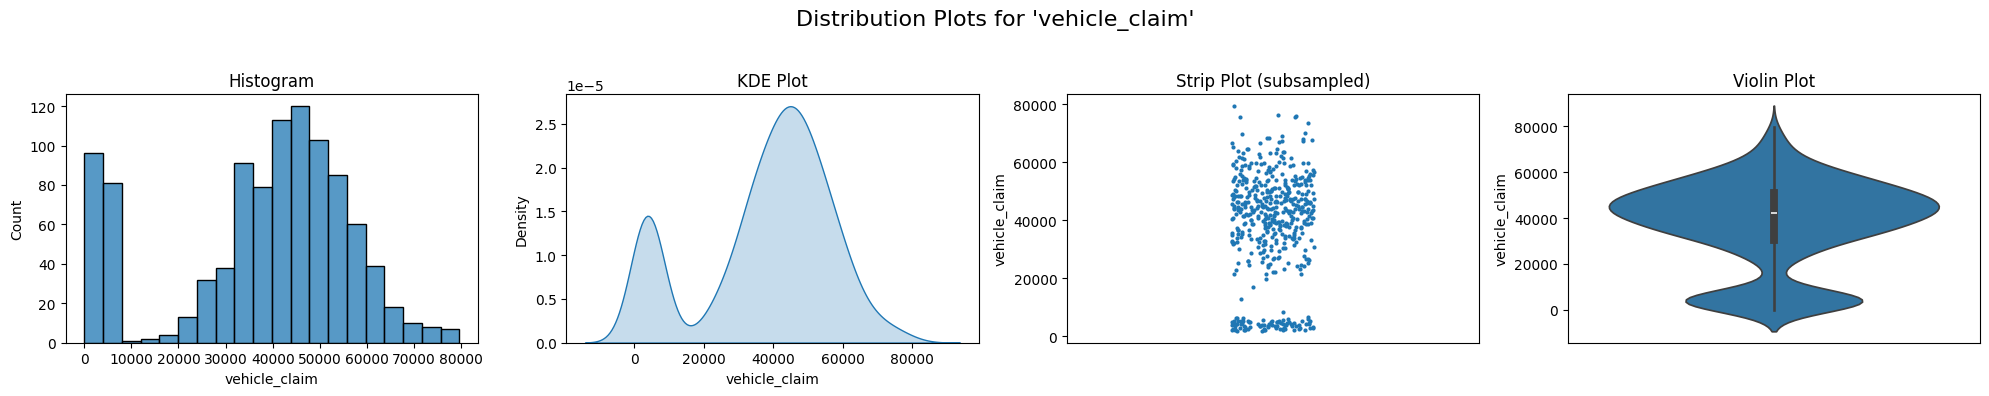

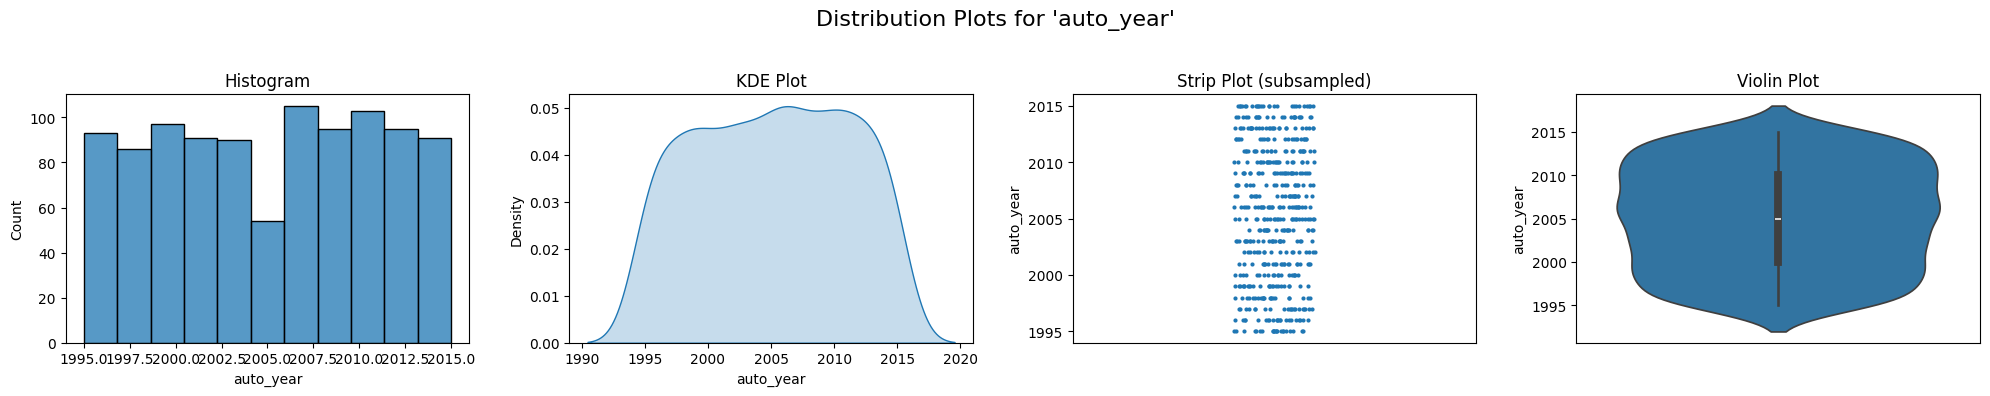

In [24]:
# Loop through each numeric column and create the plots
for col in numeric_columns:
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    fig.suptitle(f"Distribution Plots for '{col}'", fontsize=16)
    
    # Histogram Plot
    sns.histplot(dataset[col], ax=axes[0], kde=False)
    axes[0].set_title("Histogram")
    
    # KDE Plot
    sns.kdeplot(dataset[col], ax=axes[1], fill=True)
    axes[1].set_title("KDE Plot")
    
    # Strip Plot (subsampling used; avoids the swarm plot warning)
    sample_size = min(500, len(dataset))
    sample_data = dataset[col].sample(n=sample_size, random_state=42)
    sns.stripplot(x=[0]*len(sample_data), y=sample_data, ax=axes[2], size=3)
    axes[2].set_title("Strip Plot (subsampled)")
    axes[2].set_xlabel("")
    axes[2].set_xticks([])
    
    # Violin Plot
    sns.violinplot(x=[0]*len(dataset), y=dataset[col], ax=axes[3])
    axes[3].set_title("Violin Plot")
    axes[3].set_xlabel("")
    axes[3].set_xticks([])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

C:\Users\serge\AppData\Local\Temp\ipykernel_24736\1382911880.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


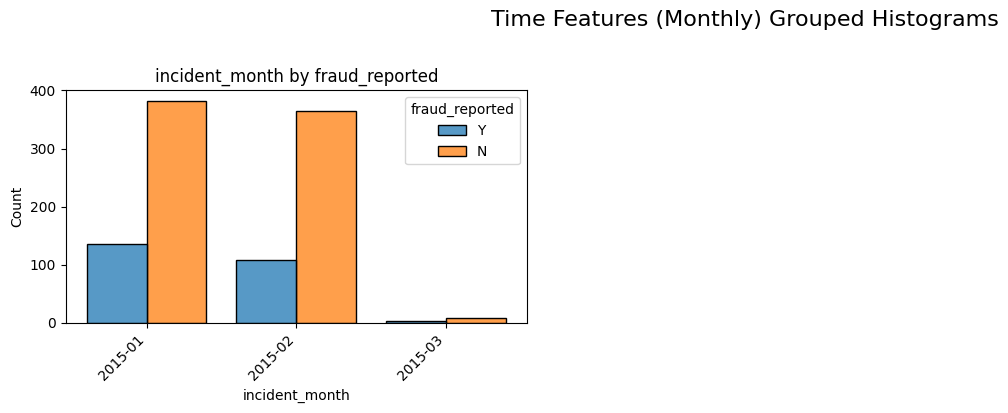

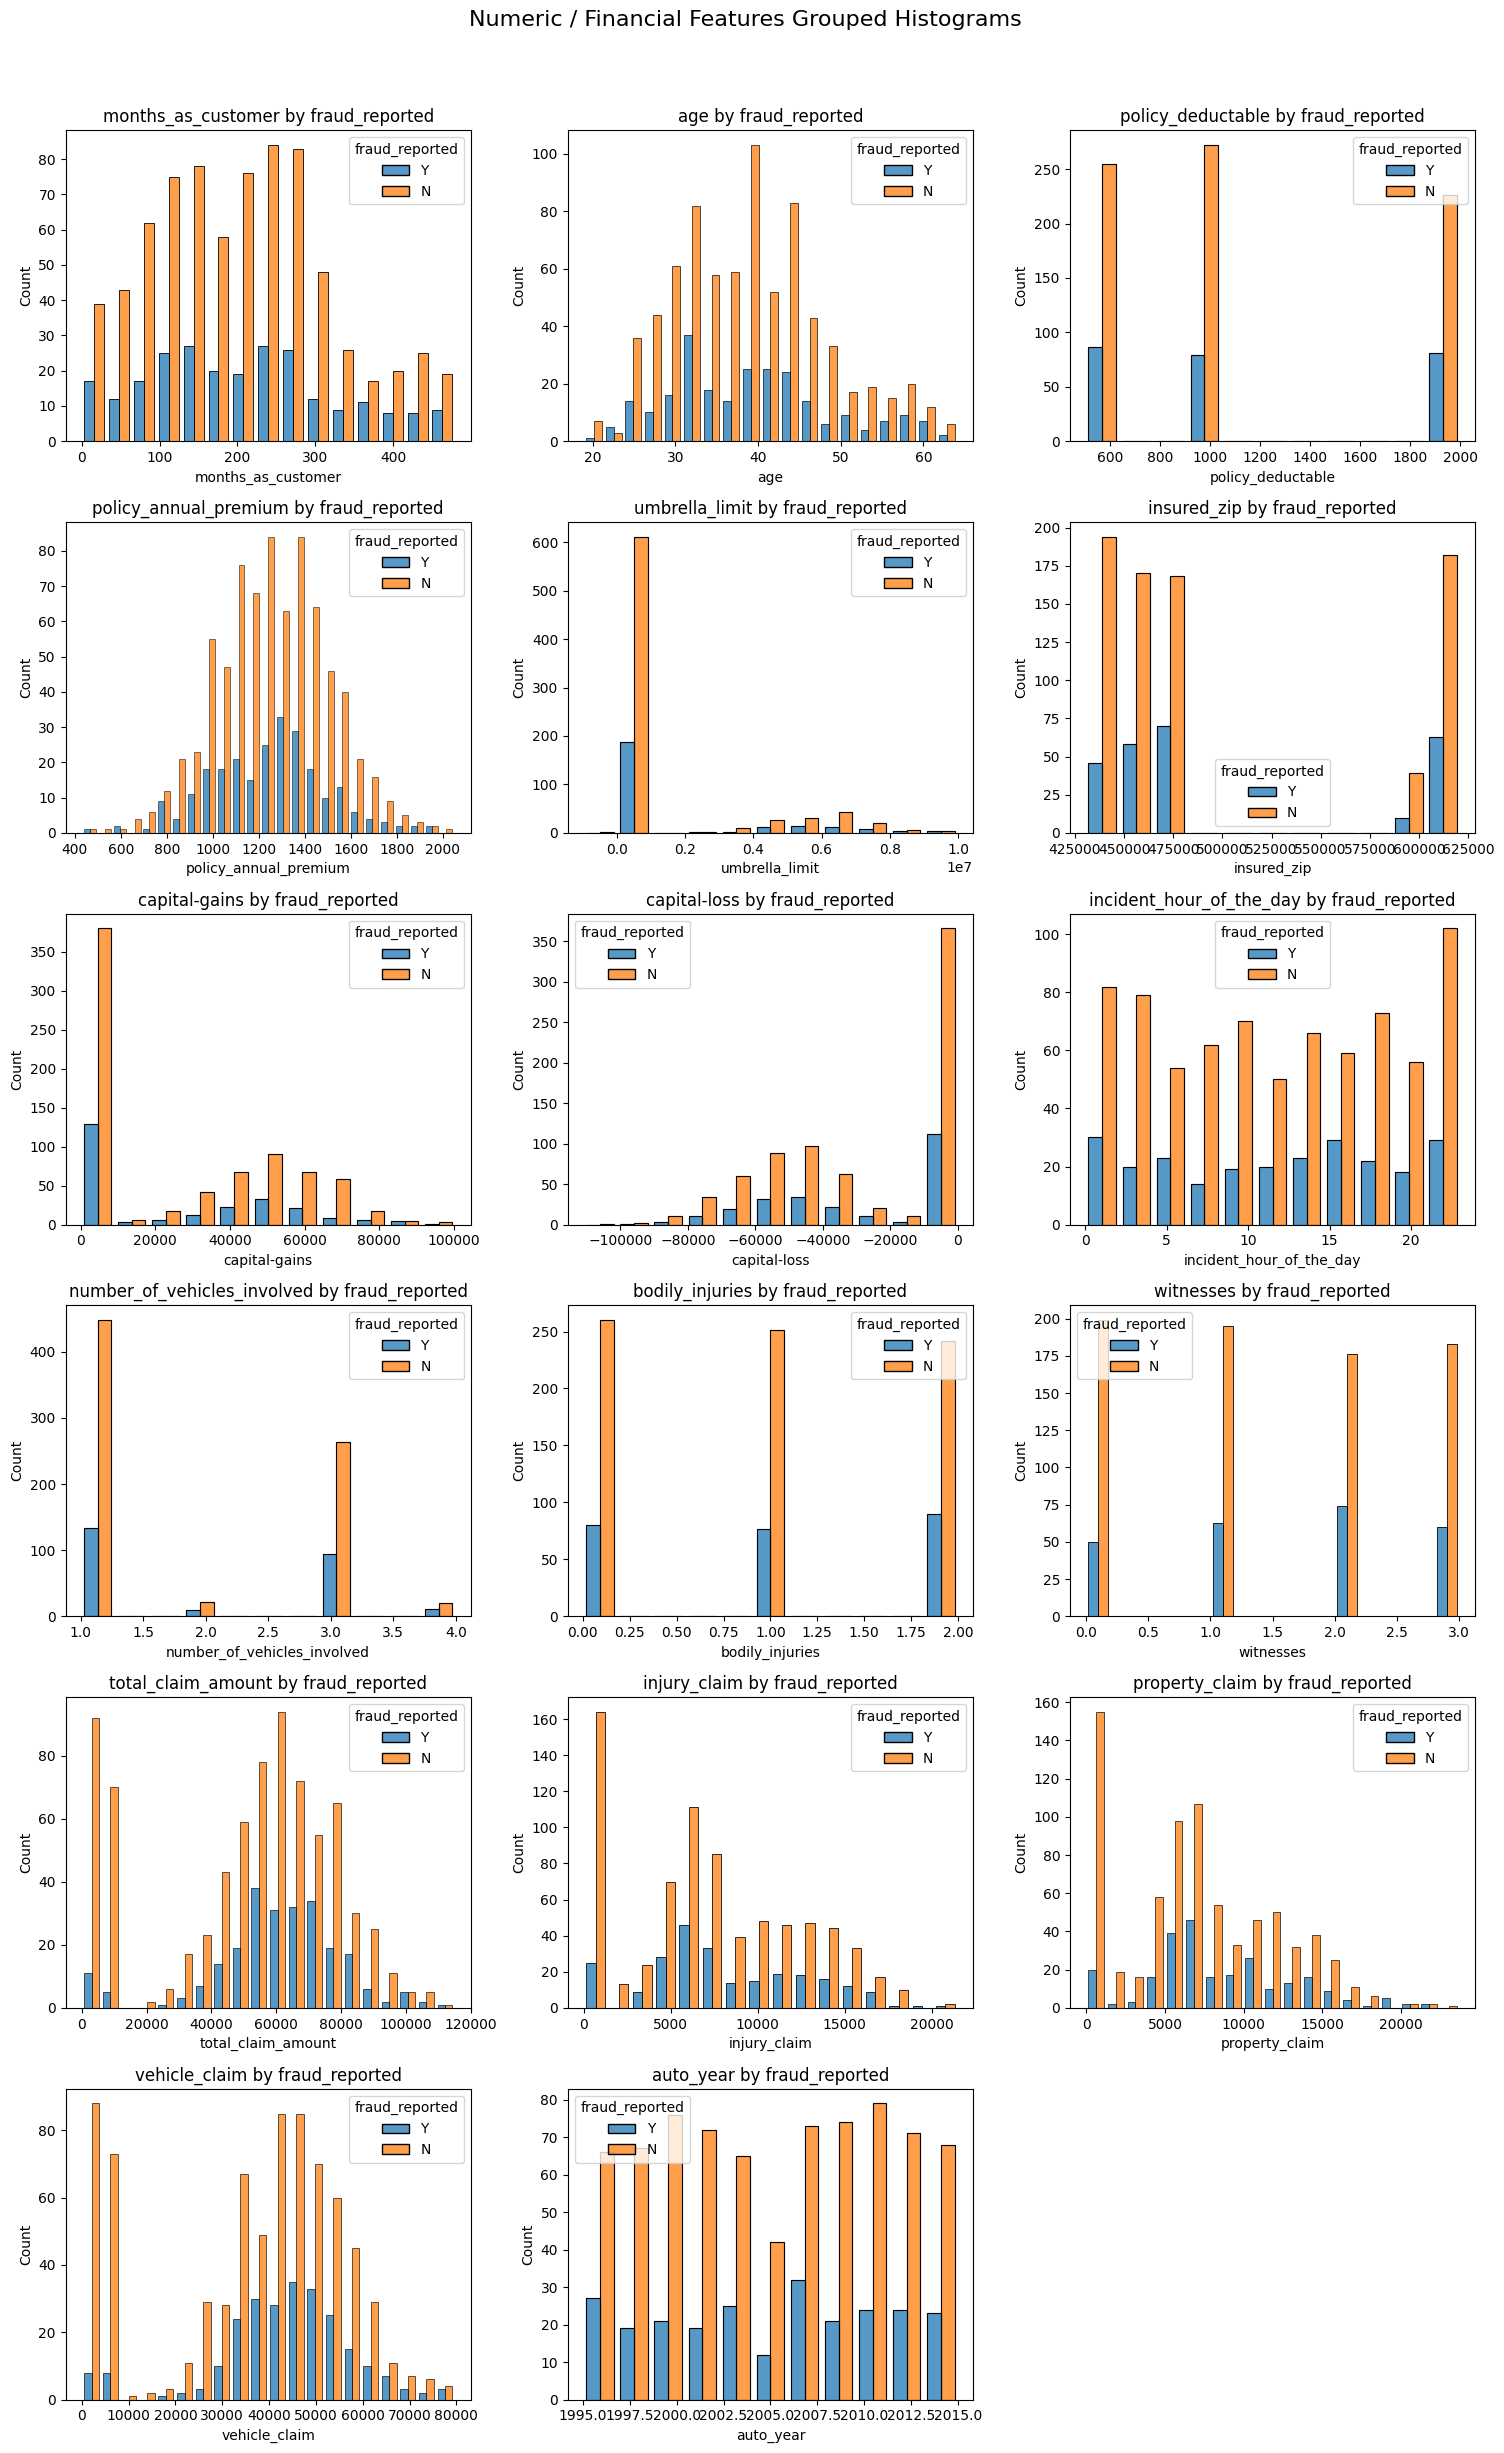

In [25]:
group_var = 'fraud_reported'

# First, convert date columns to datetime
for date_col in ['incident_date', 'policy_bind_date']:
    dataset[date_col] = pd.to_datetime(dataset[date_col])

# Create new month-year columns for plotting purposes
dataset['incident_month'] = dataset['incident_date'].dt.to_period('M').astype(str)


# Use the newly created monthly features instead
time_features_monthly = ['incident_month']

numeric_features = dataset.select_dtypes(include=['number']).columns.tolist()

def plot_grouped_histograms(features, title_prefix, rotate_xticks=False):
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    for ax, feature in zip(axes, features):
        sns.histplot(data=dataset, x=feature, hue=group_var, multiple='dodge', shrink=0.8, ax=ax)
        ax.set_title(f"{feature} by {group_var}")
        
        # Rotate and limit the number of x-axis labels if needed
        if rotate_xticks:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    for i in range(len(features), len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle(f"{title_prefix} Grouped Histograms", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot time-related features with rotated labels
plot_grouped_histograms(time_features_monthly, "Time Features (Monthly)", rotate_xticks=True)

# Plot numeric/financial features
plot_grouped_histograms(numeric_features, "Numeric / Financial Features")


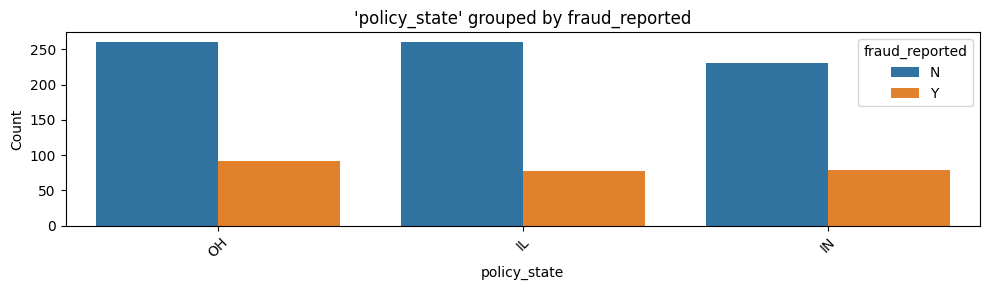

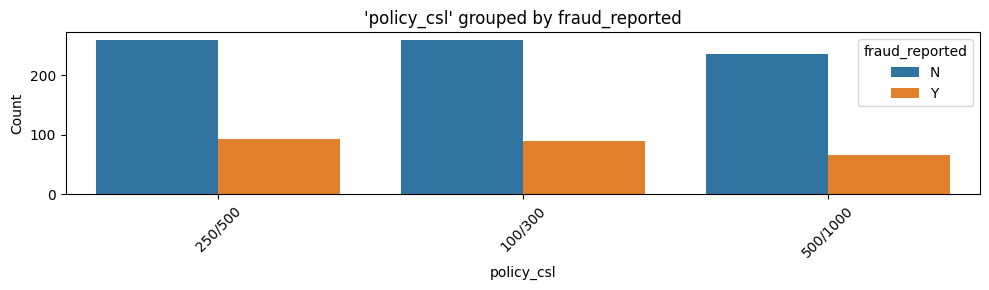

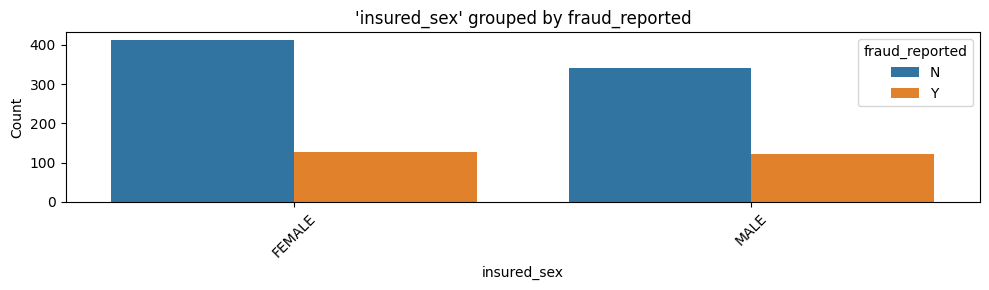

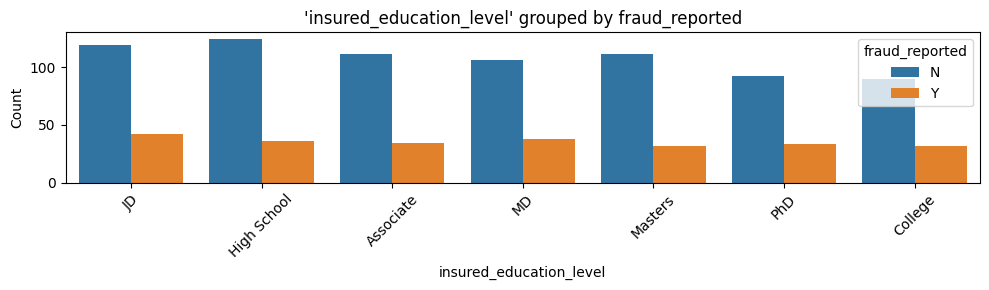

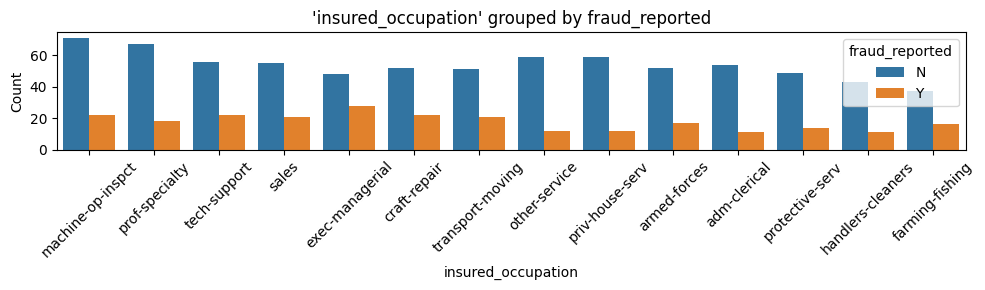

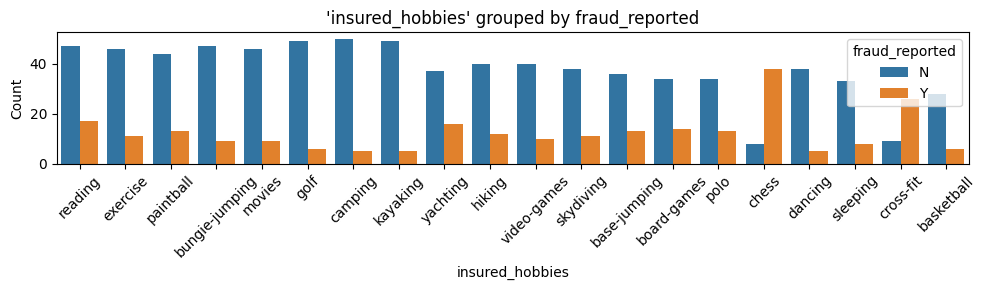

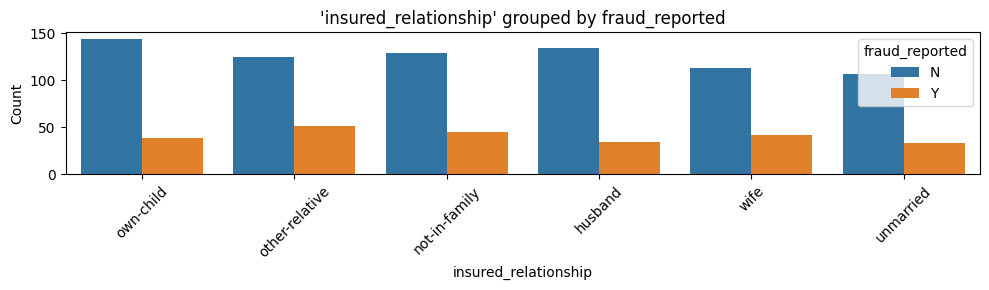

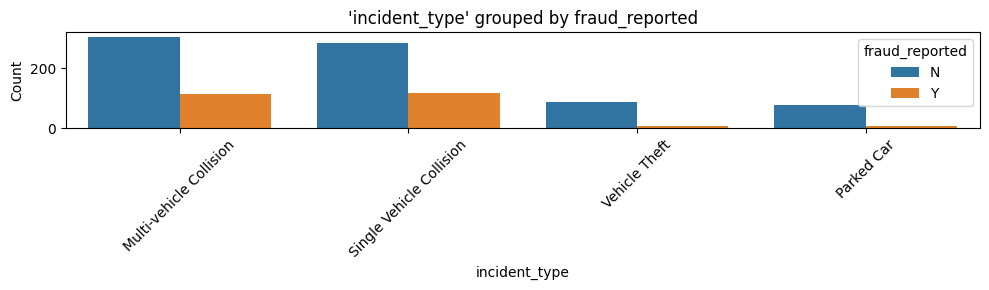

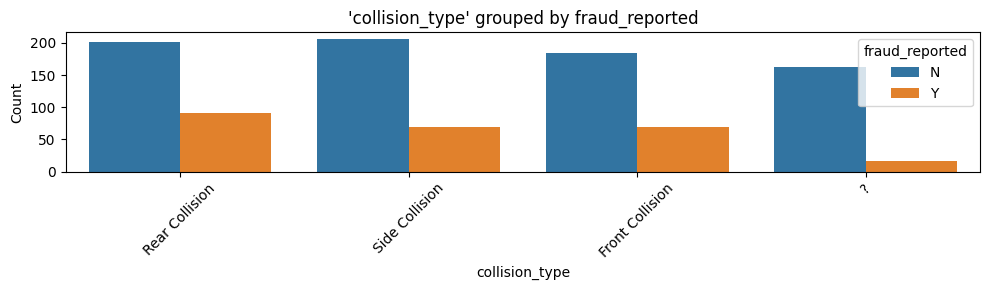

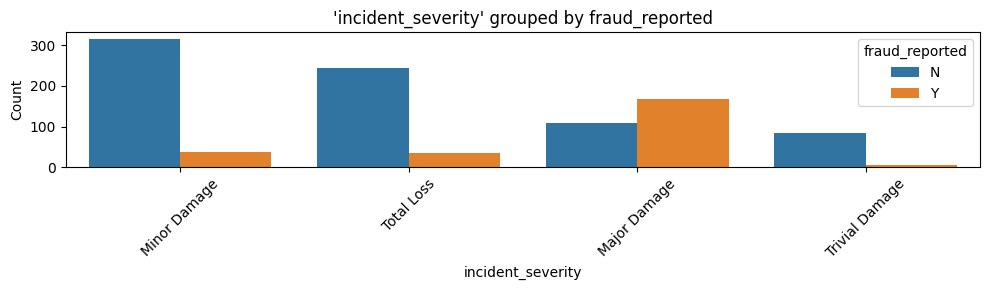

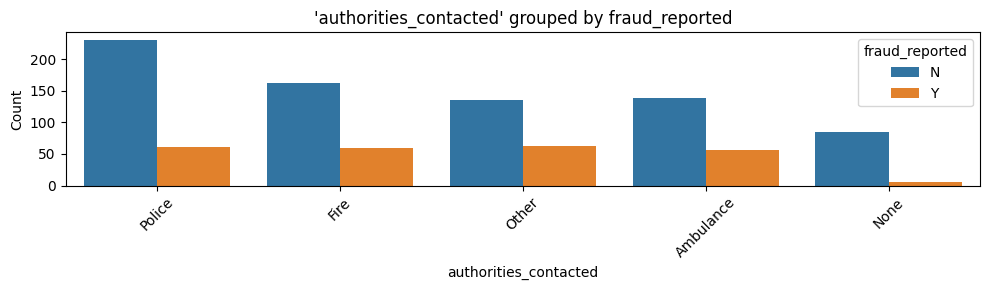

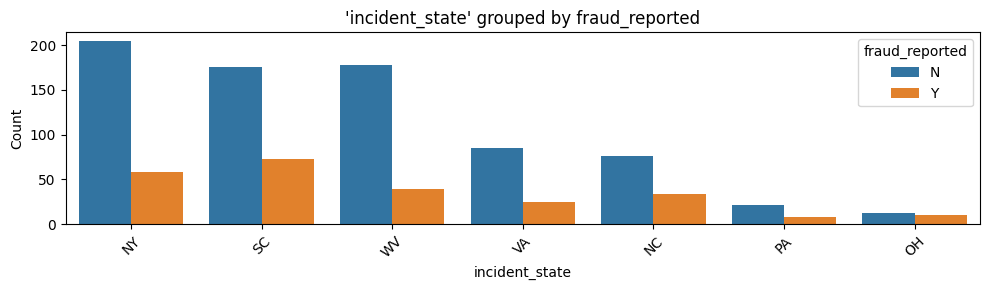

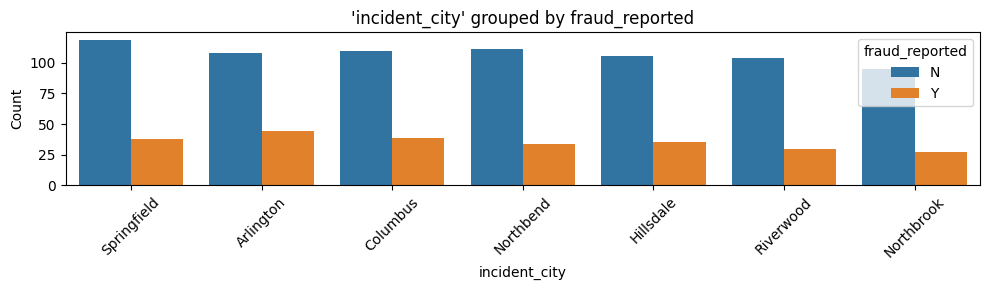

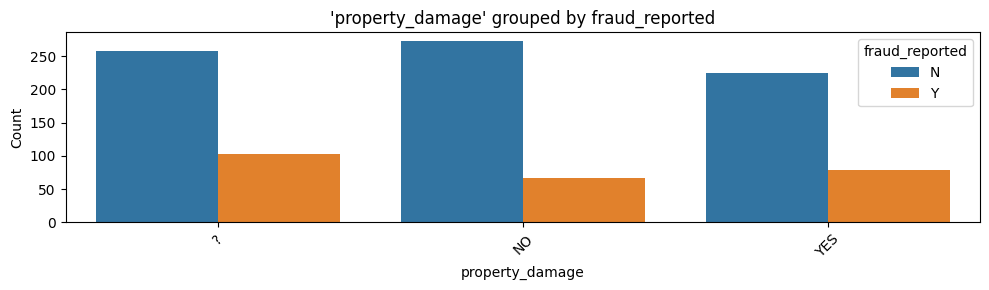

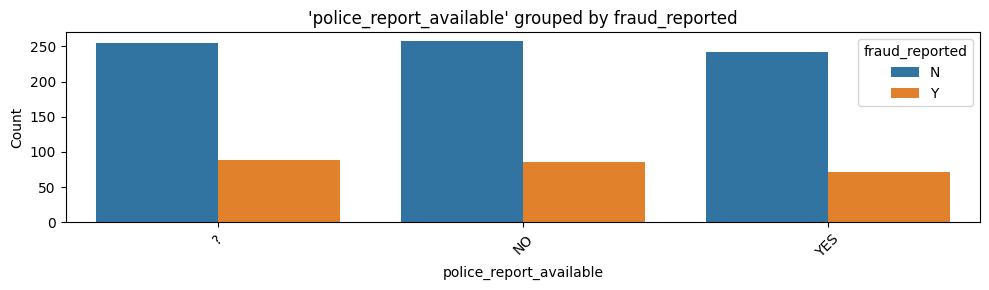

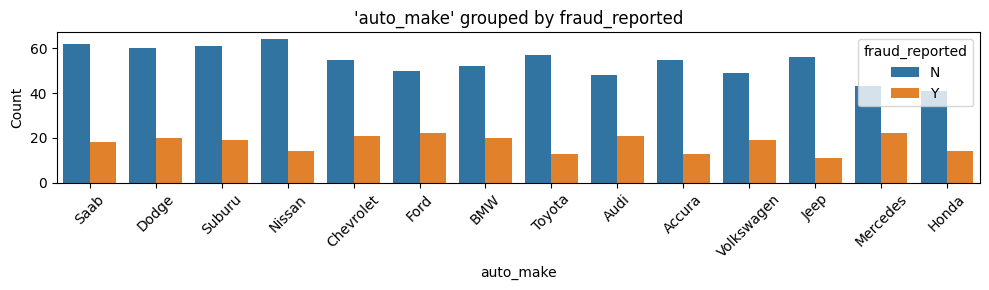

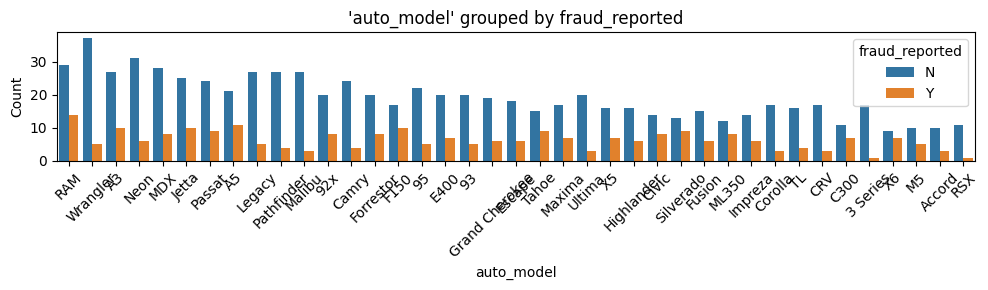

C:\Users\serge\AppData\Local\Temp\ipykernel_24736\4156324024.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="fraud_reported")


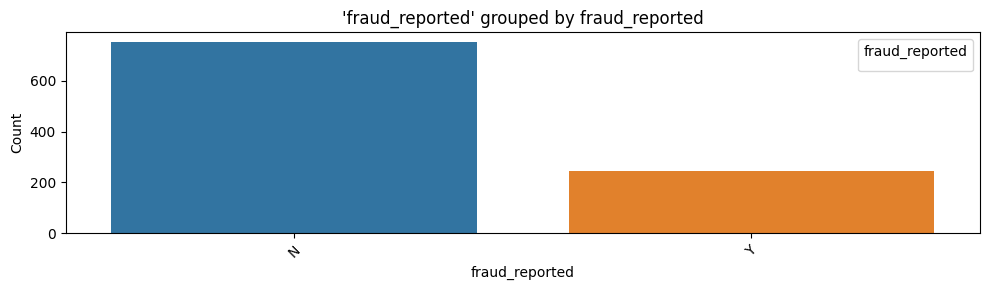

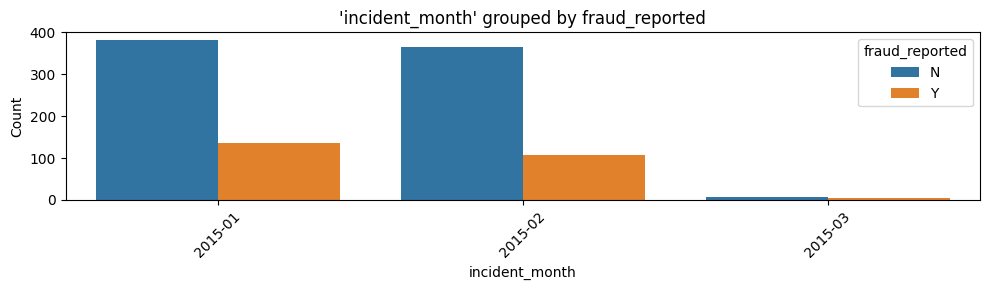

In [27]:
# Select categorical columns 
categorical_columns = dataset.select_dtypes(exclude=["number"]).columns.drop(['incident_date', 'policy_bind_date','incident_location']).tolist() #,'policy_bind_month'

# Loop through each categorical column and plot grouped counts based on FraudFound
for col in categorical_columns:
    plt.figure(figsize=(10, 3))
    # Order categories by total count (highest to lowest)
    order = dataset[col].value_counts().index
    sns.countplot(data=dataset, x=col, hue='fraud_reported', order=order, hue_order = ['N', 'Y'])
    
    plt.title(f"'{col}' grouped by fraud_reported")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="fraud_reported")
    plt.tight_layout()
    plt.show()

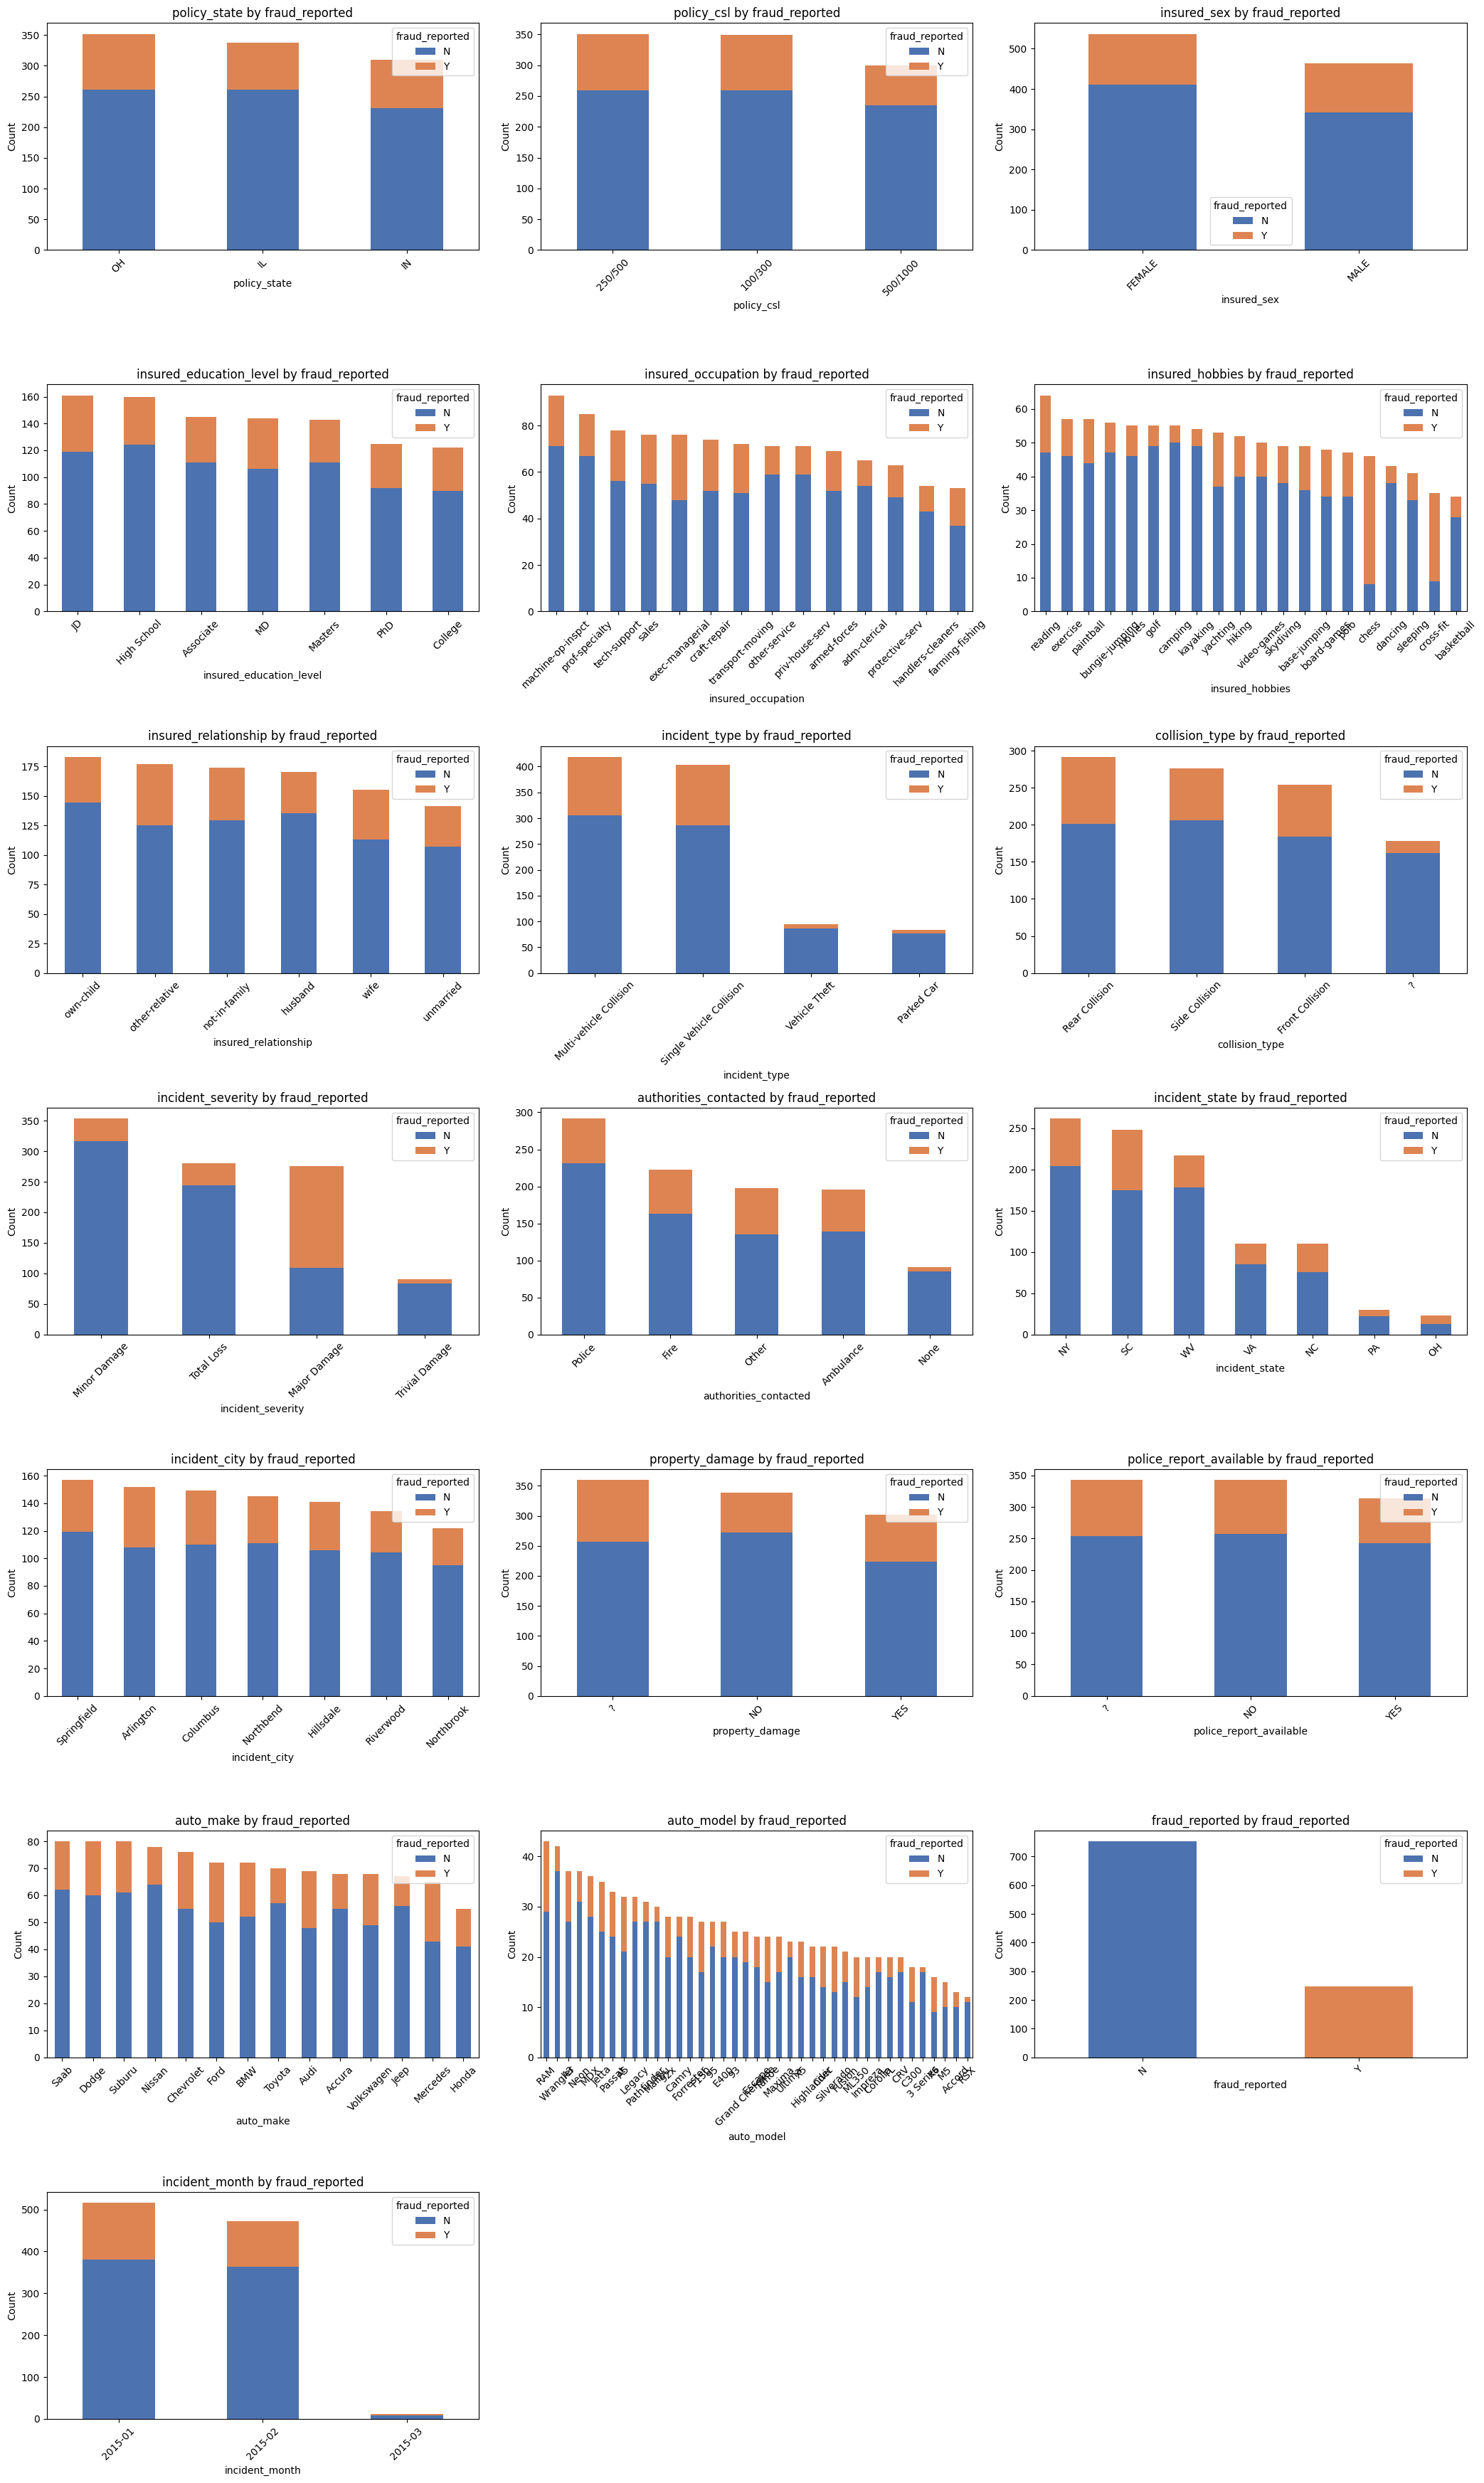

In [29]:
categorical_columns = dataset.select_dtypes(exclude=["number"]).columns.drop(['incident_date', 'policy_bind_date','incident_location']).tolist() #,'policy_bind_month'

# Define plotting function for stacked bar plots
def plot_stacked_bars(features, group_var='fraud_reported'):
    n_features = len(features)
    n_cols = 3  #
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 5 * n_rows))
    axes = axes.flatten()

    for ax, col in zip(axes, features):
        counts = pd.crosstab(dataset[col], dataset[group_var])
        counts = counts[['N', 'Y']]  # explicitly order categories
        counts = counts.reindex(dataset[col].value_counts().index)

        counts.plot(kind='bar', stacked=True, ax=ax, color=['#4c72b0', '#dd8452'])
        
        ax.set_title(f"{col} by {group_var}")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)

    # Remove any extra axes
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Now plot your categorical columns as stacked bars
plot_stacked_bars(categorical_columns)


In [30]:
bool_cols = df_encoded.select_dtypes(include=["bool"]).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   months_as_customer                   1000 non-null   int64  
 1   age                                  1000 non-null   int64  
 2   policy_bind_date                     1000 non-null   object 
 3   policy_state                         1000 non-null   object 
 4   policy_csl                           1000 non-null   object 
 5   policy_deductable                    1000 non-null   int64  
 6   policy_annual_premium                1000 non-null   float64
 7   umbrella_limit                       1000 non-null   int64  
 8   insured_zip                          1000 non-null   int64  
 9   insured_occupation                   1000 non-null   object 
 10  insured_hobbies                      1000 non-null   object 
 11  insured_relationship           

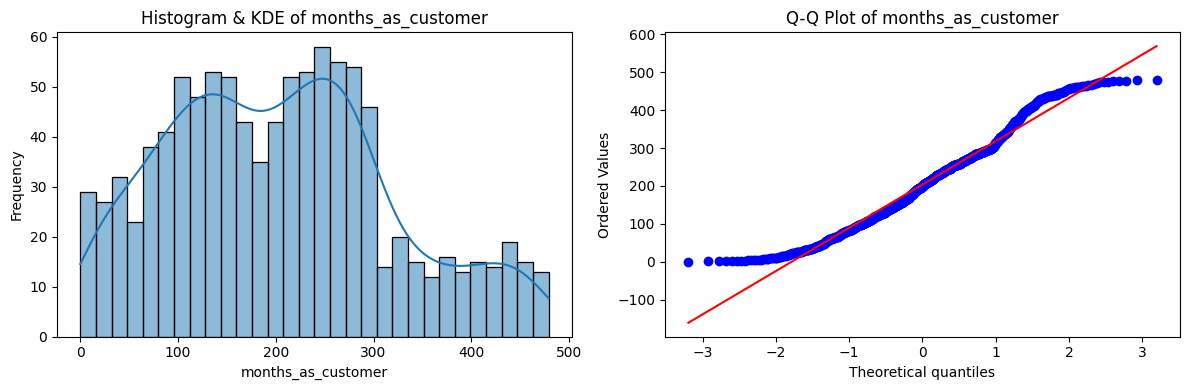

months_as_customer: Skewness = 0.36, Kurtosis = -0.49



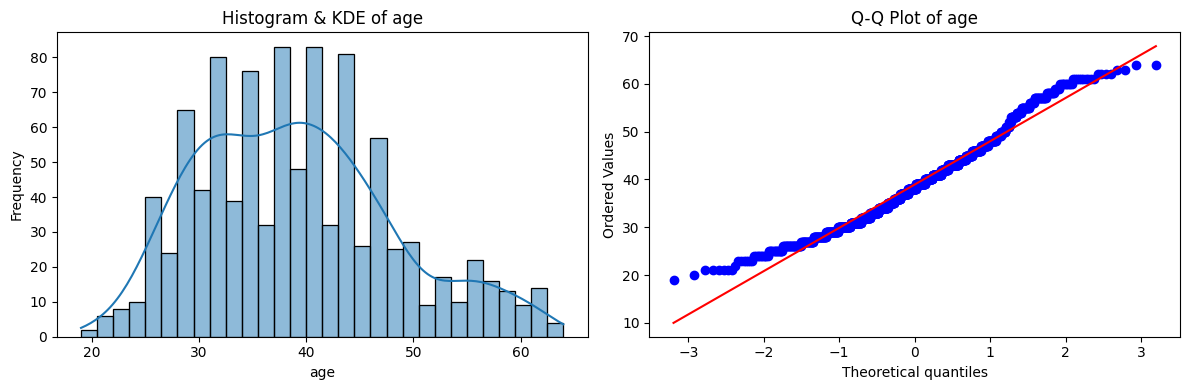

age: Skewness = 0.48, Kurtosis = -0.26



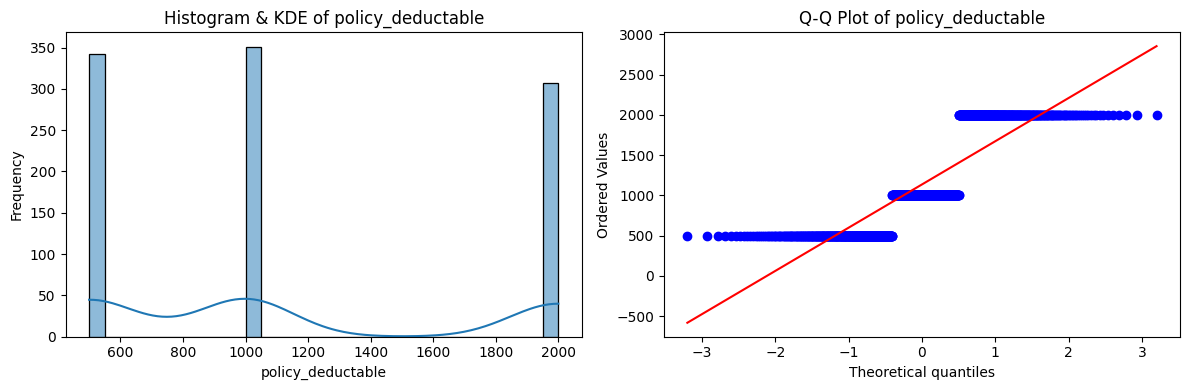

policy_deductable: Skewness = 0.48, Kurtosis = -1.38



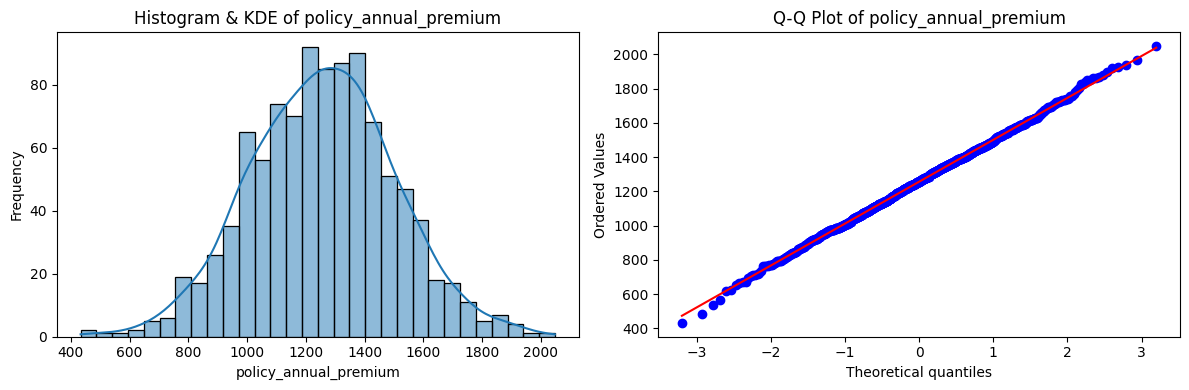

policy_annual_premium: Skewness = 0.00, Kurtosis = 0.07



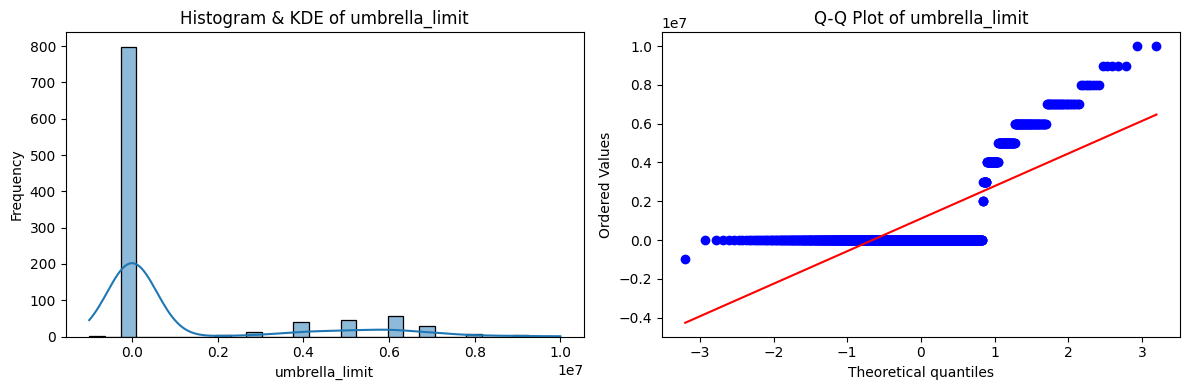

umbrella_limit: Skewness = 1.81, Kurtosis = 1.79



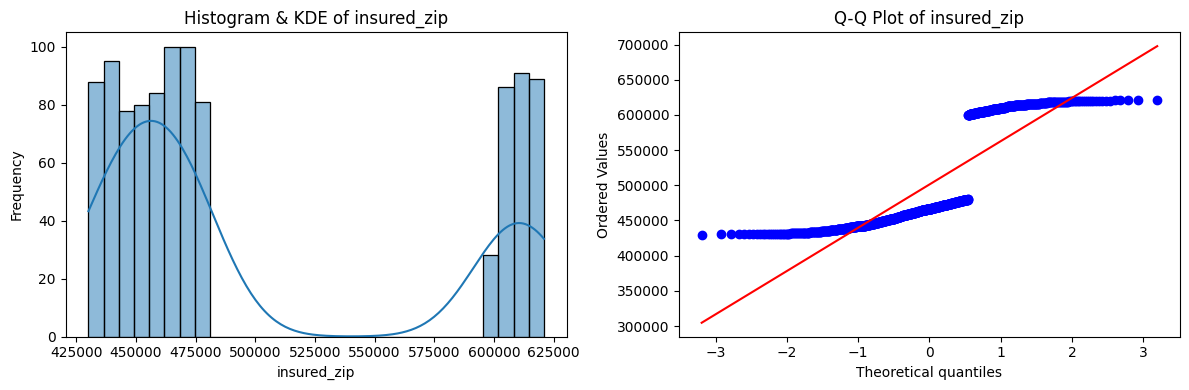

insured_zip: Skewness = 0.82, Kurtosis = -1.19



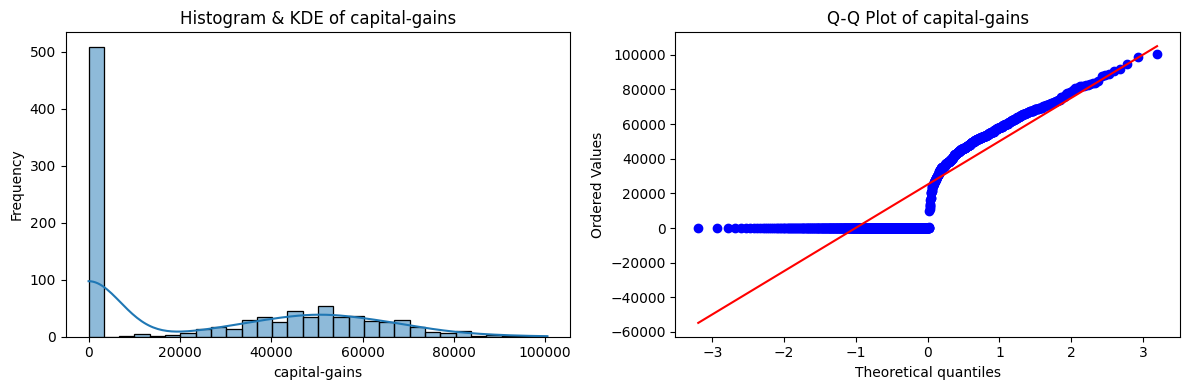

capital-gains: Skewness = 0.48, Kurtosis = -1.28



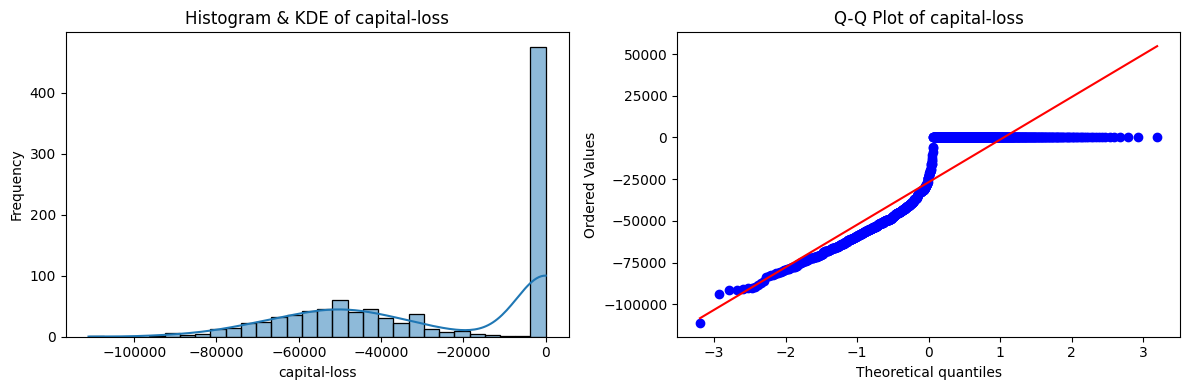

capital-loss: Skewness = -0.39, Kurtosis = -1.31



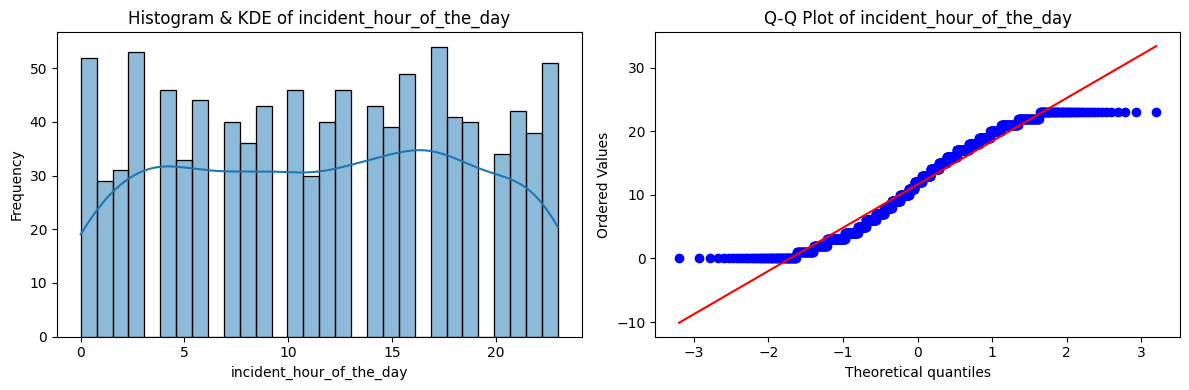

incident_hour_of_the_day: Skewness = -0.04, Kurtosis = -1.19



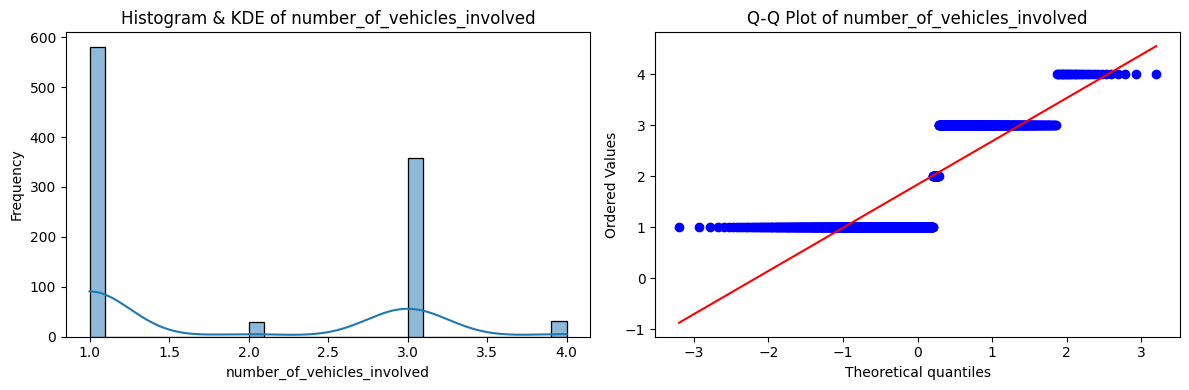

number_of_vehicles_involved: Skewness = 0.50, Kurtosis = -1.50



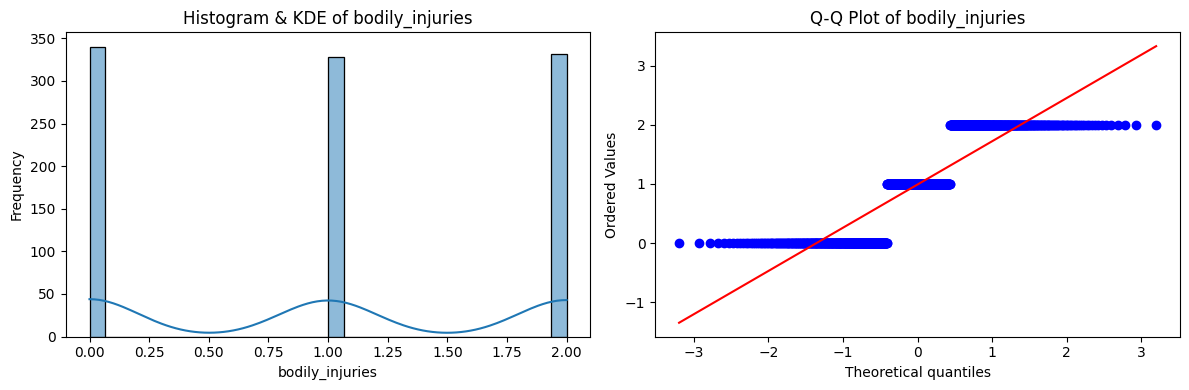

bodily_injuries: Skewness = 0.01, Kurtosis = -1.51



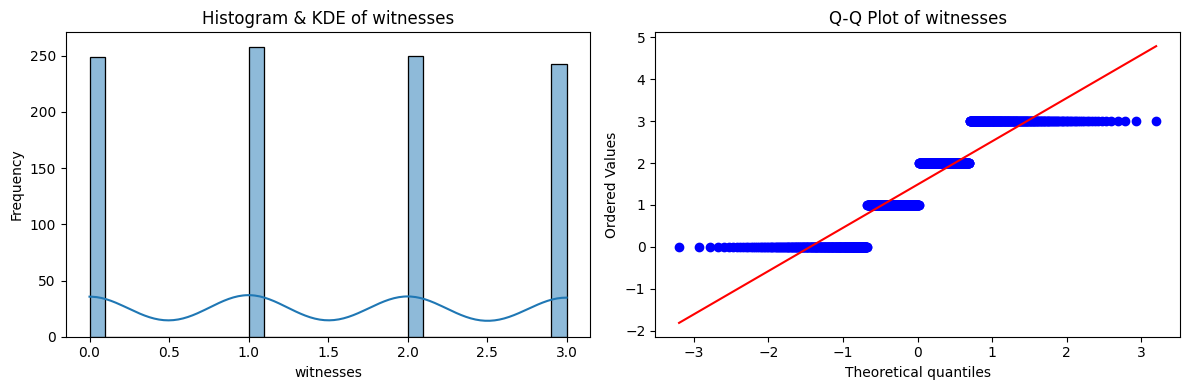

witnesses: Skewness = 0.02, Kurtosis = -1.34



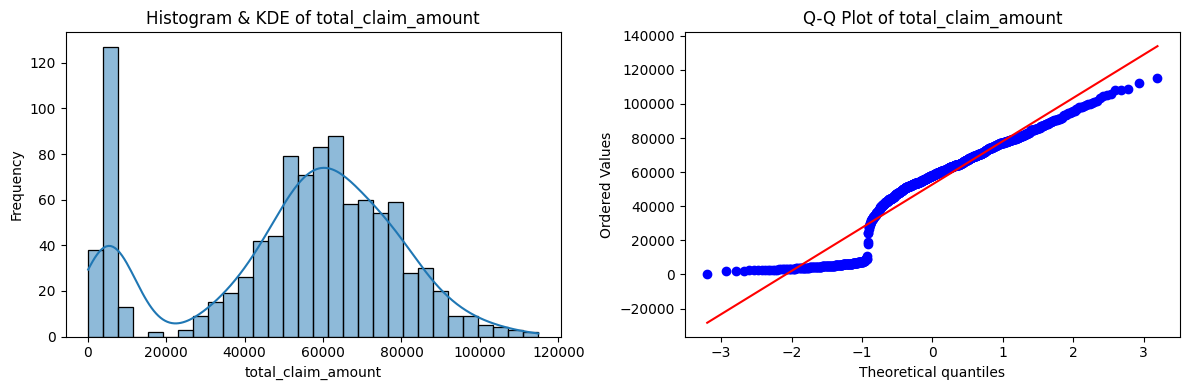

total_claim_amount: Skewness = -0.59, Kurtosis = -0.45



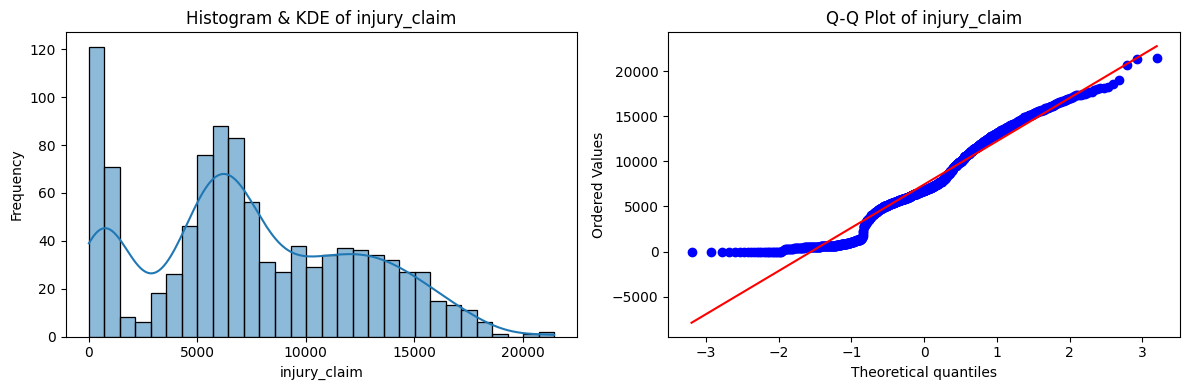

injury_claim: Skewness = 0.26, Kurtosis = -0.76



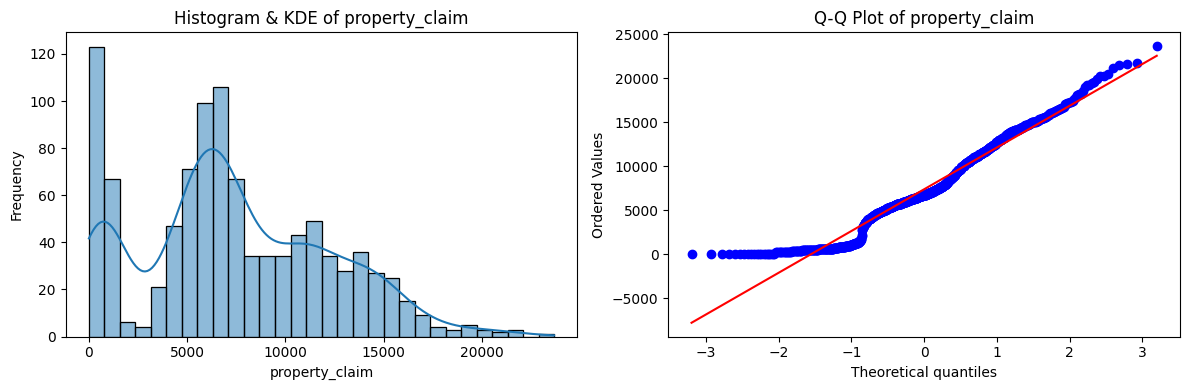

property_claim: Skewness = 0.38, Kurtosis = -0.38



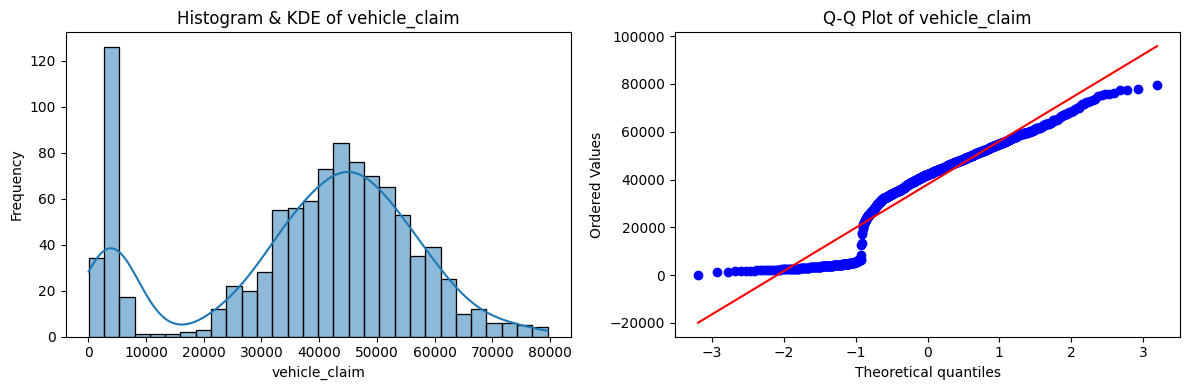

vehicle_claim: Skewness = -0.62, Kurtosis = -0.45



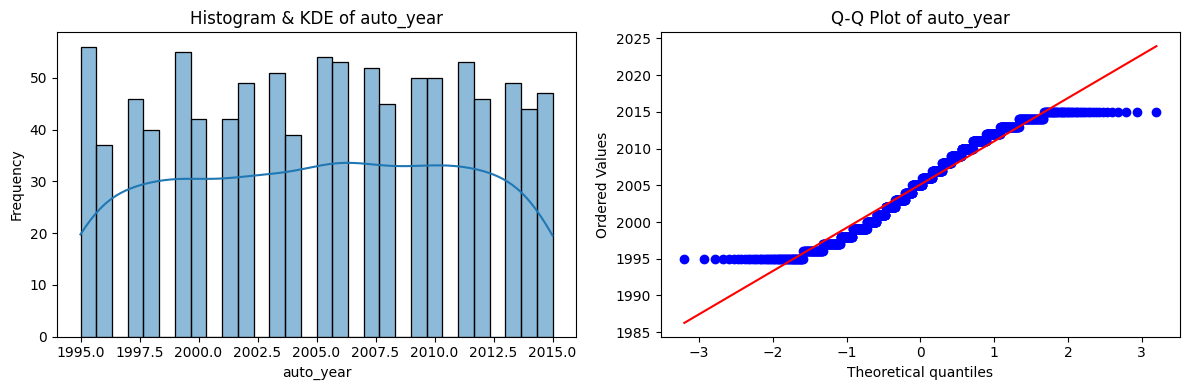

auto_year: Skewness = -0.05, Kurtosis = -1.17



In [31]:
# Create a list of numeric features from the dataset
numeric_features = dataset.select_dtypes(include=['number']).columns.tolist()

# Loop over each numeric feature and plot its distribution
for feature in numeric_features:
    data = dataset[feature].dropna()  # drop missing values if any
    
    # Create a figure with two subplots: one for the histogram and one for the Q-Q plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram with KDE overlay
    sns.histplot(data, kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"Histogram & KDE of {feature}")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Frequency")
    
    # Q-Q Plot to assess normality
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot of {feature}")
    
    plt.tight_layout()
    plt.show()
    
    # Print skewness and kurtosis for additional insight
    skewness = data.skew()
    kurtosis = data.kurtosis()
    print(f"{feature}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}\n")

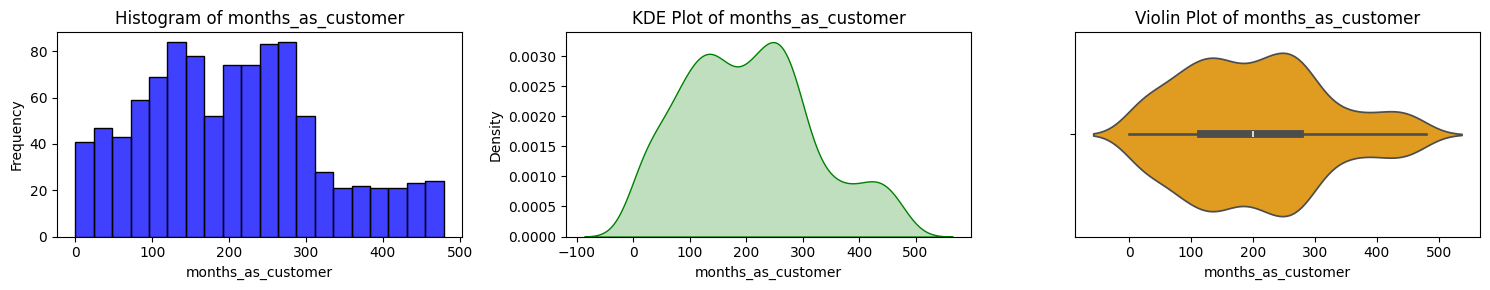

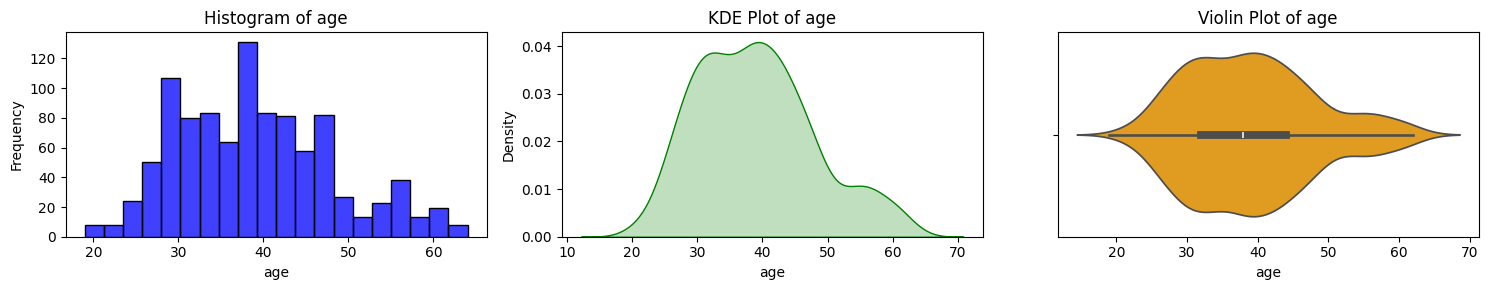

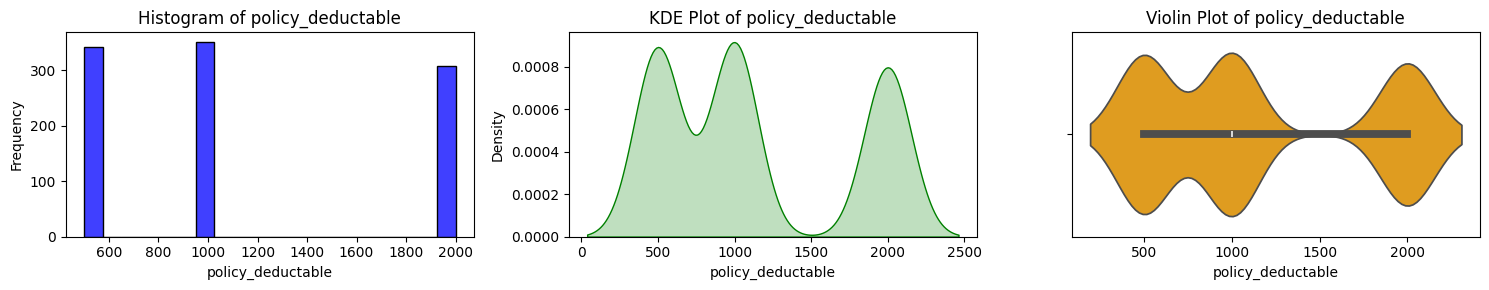

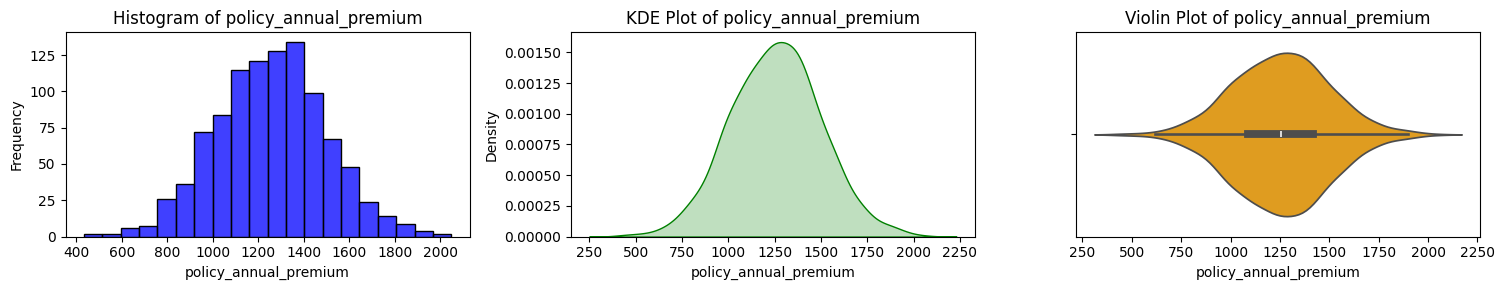

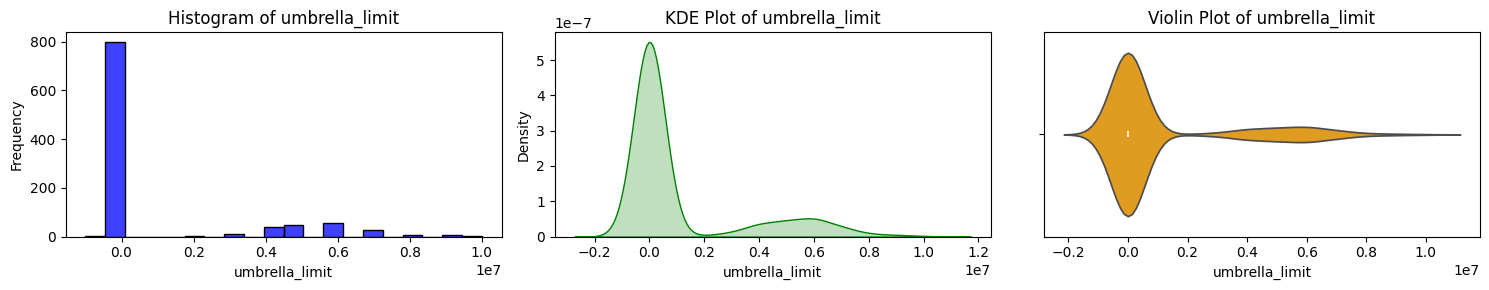

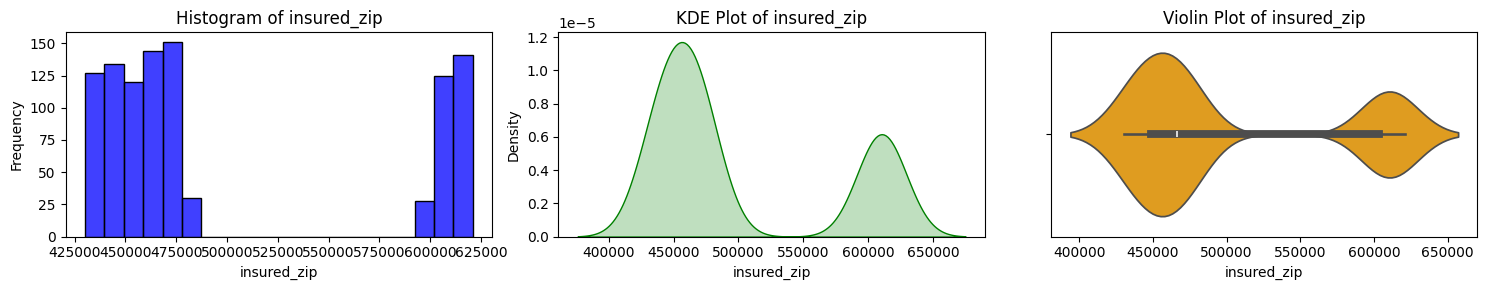

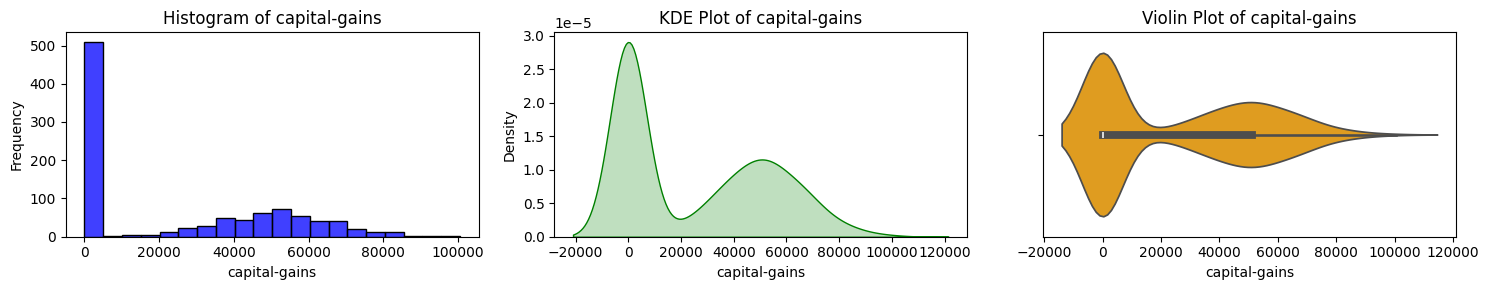

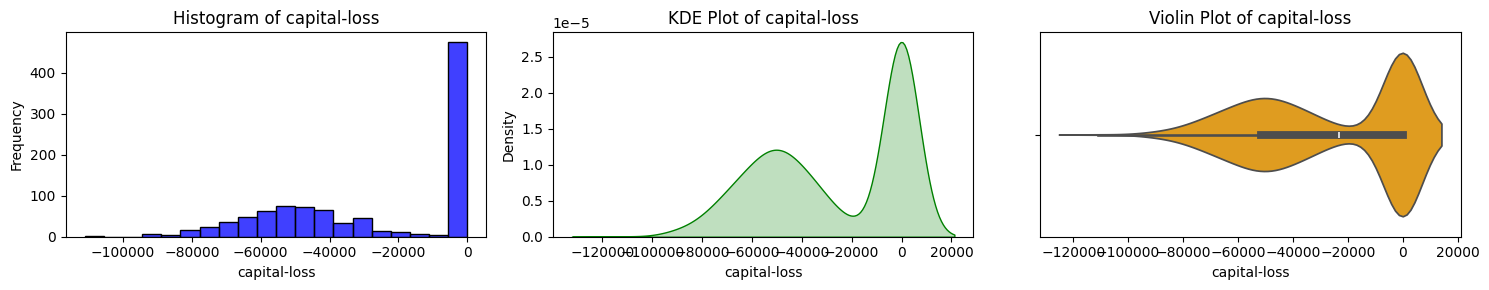

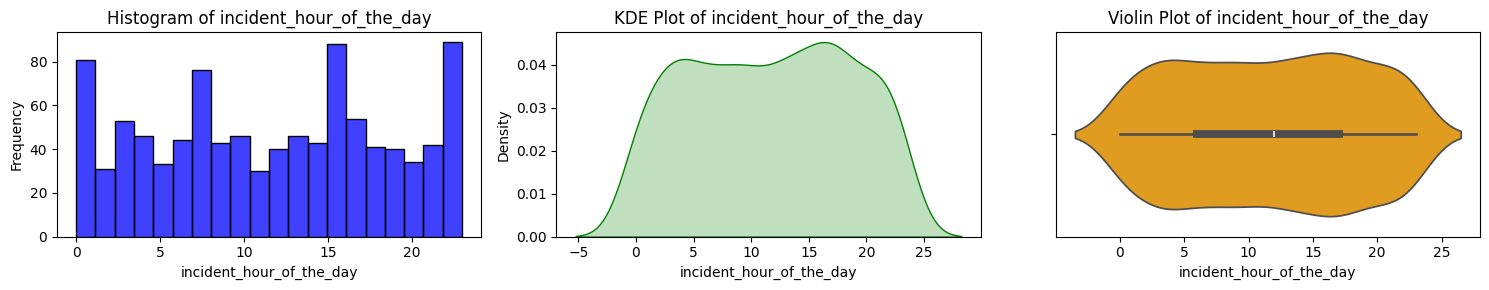

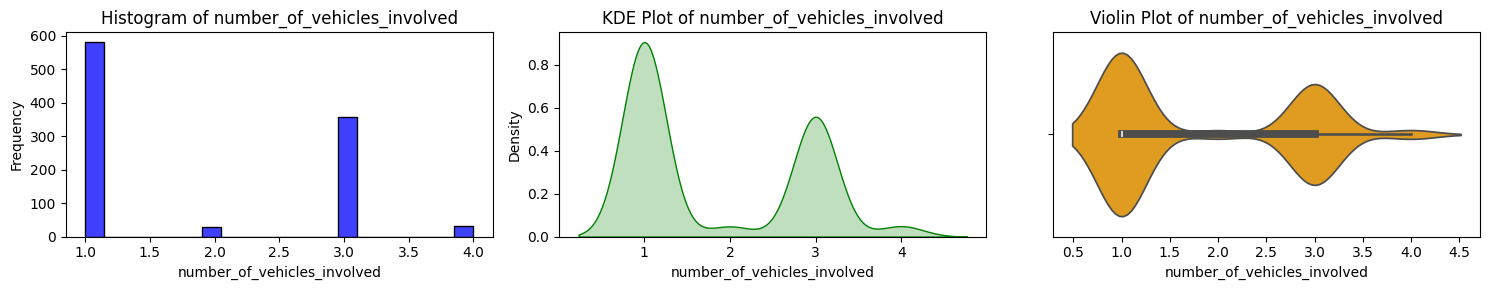

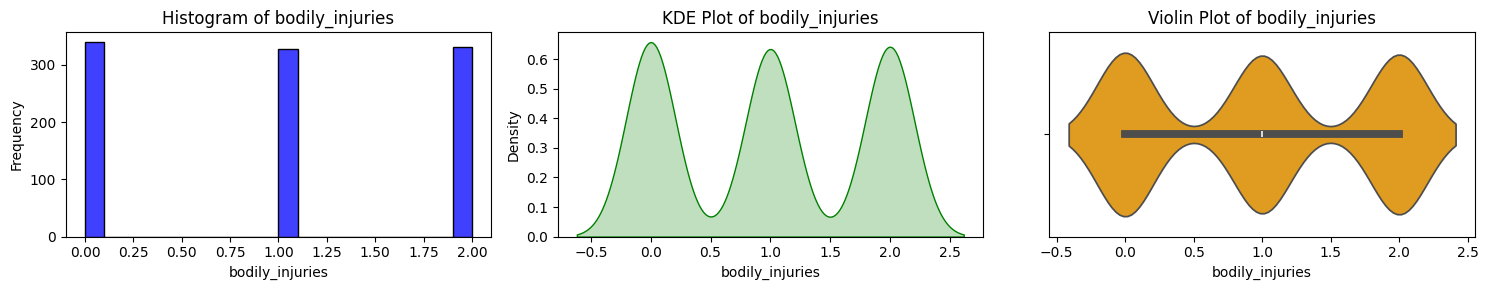

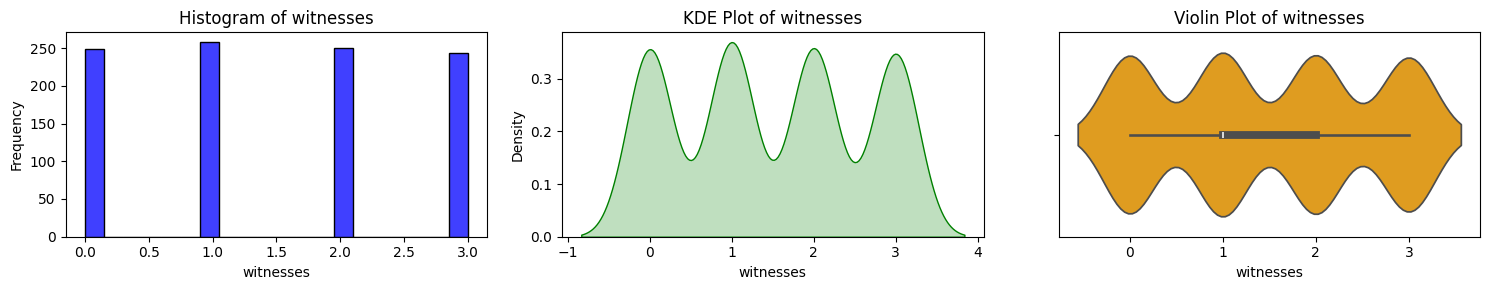

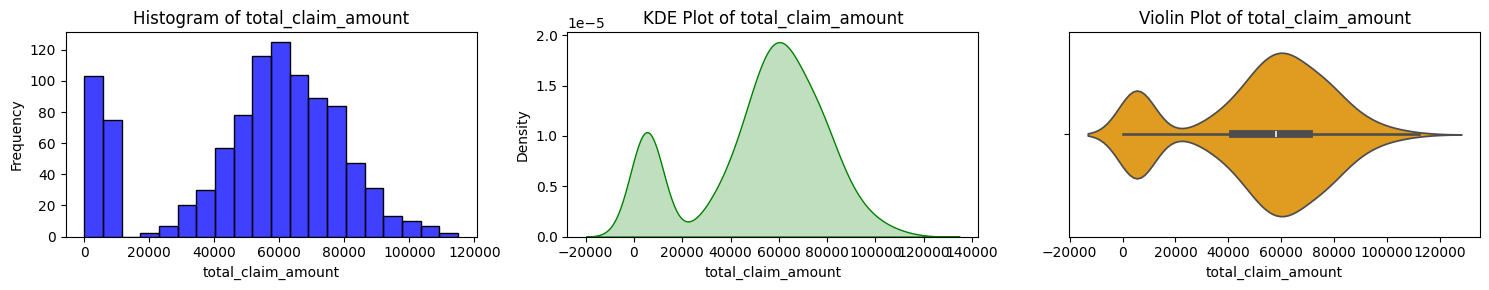

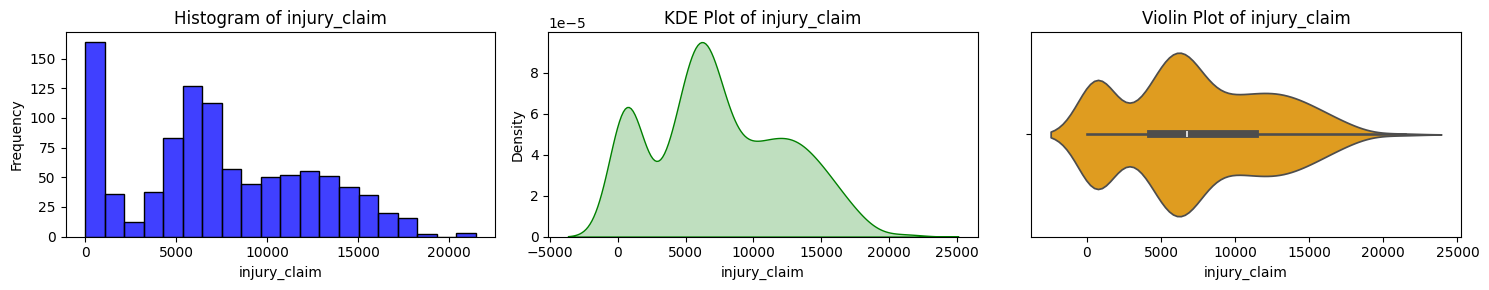

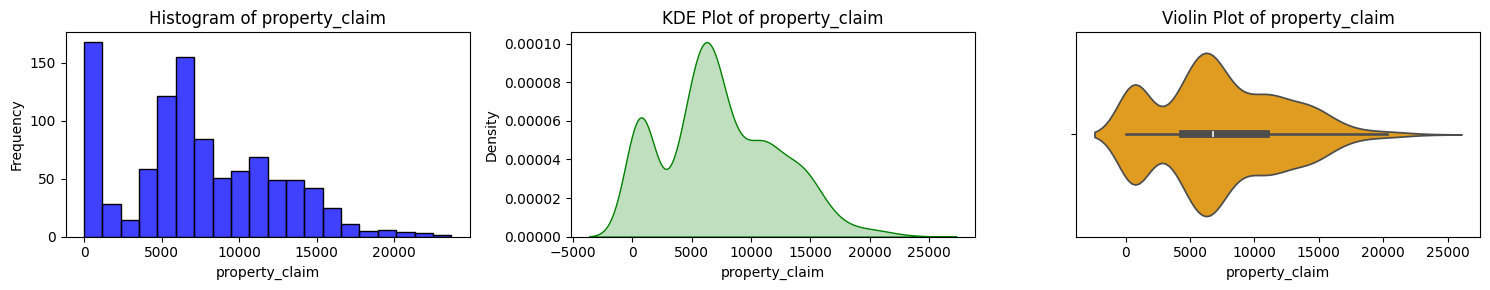

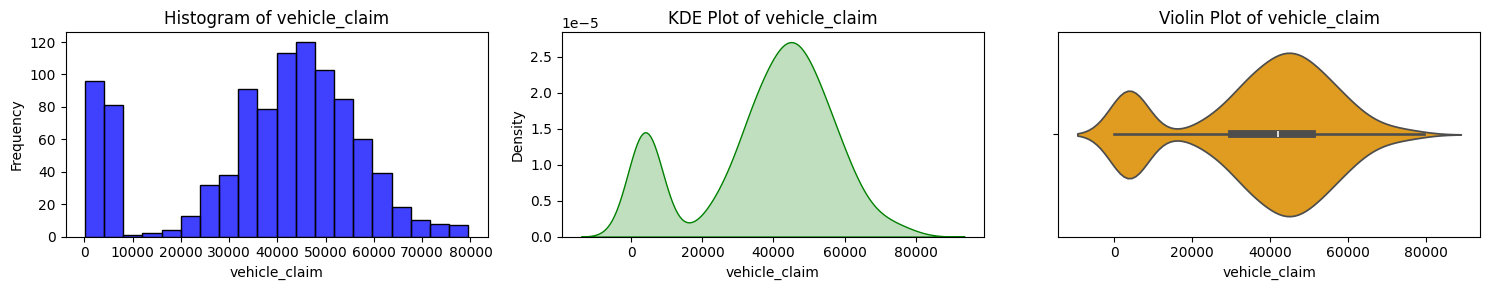

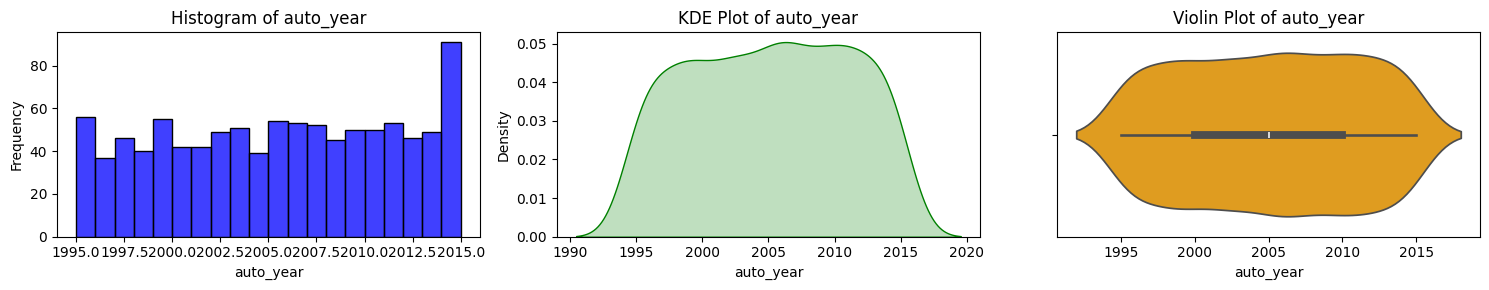

In [37]:
# Create a histogram, kde plot, and violin plot for each feature
for feature in numeric_features:
    plt.figure(figsize=(15, 3))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(dataset[feature], kde=False, color='blue', bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(dataset[feature], fill=True, color='green')  # Replaced shade with fill
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=dataset[feature], color='orange')
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()		

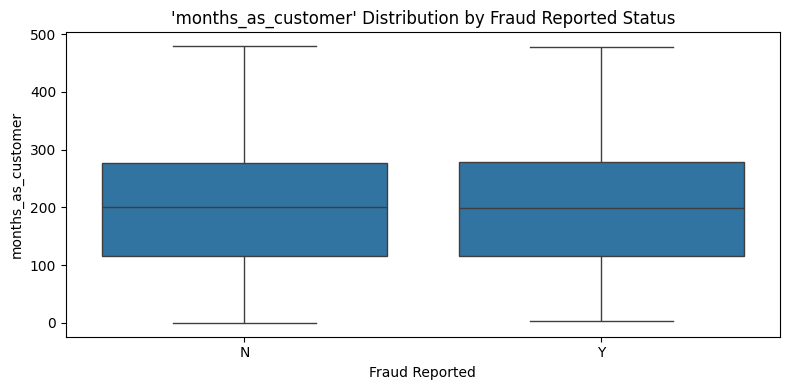

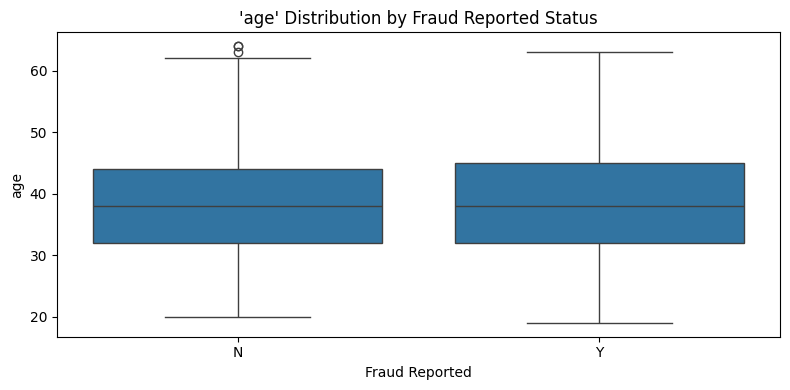

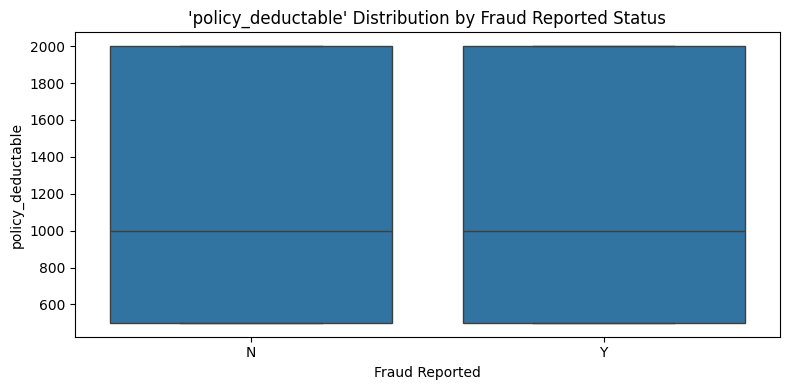

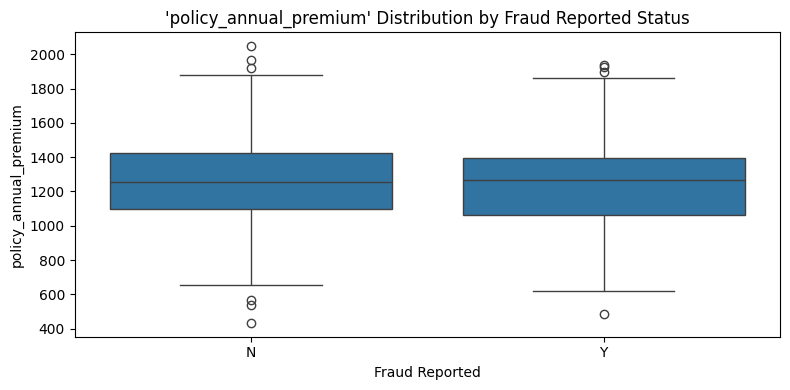

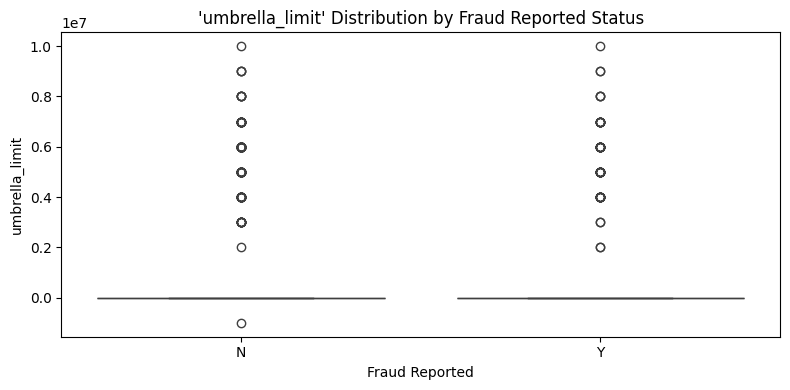

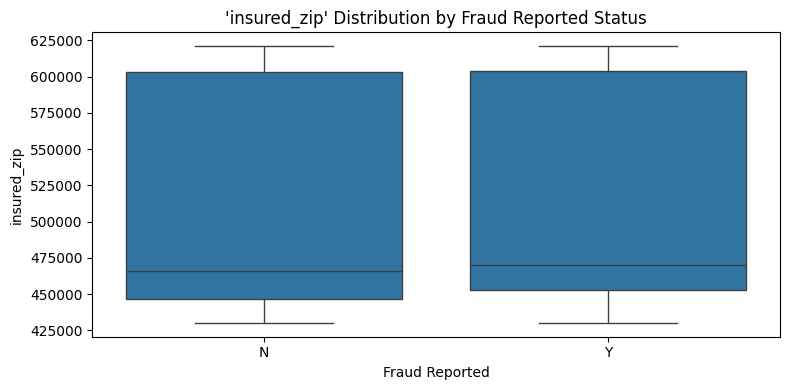

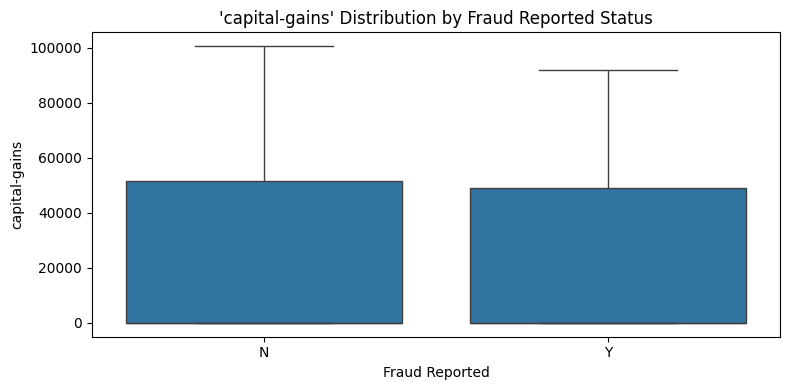

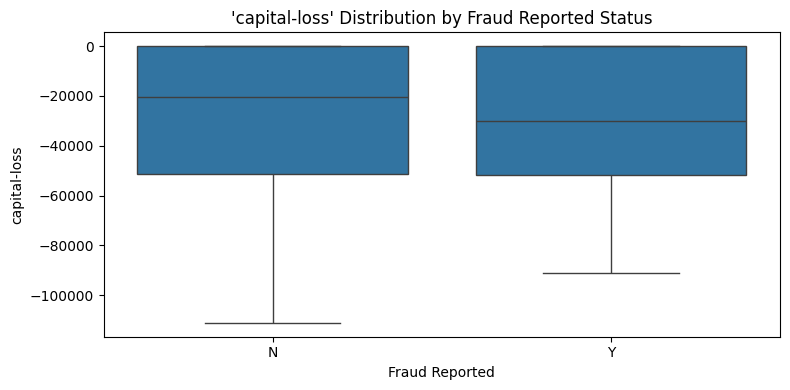

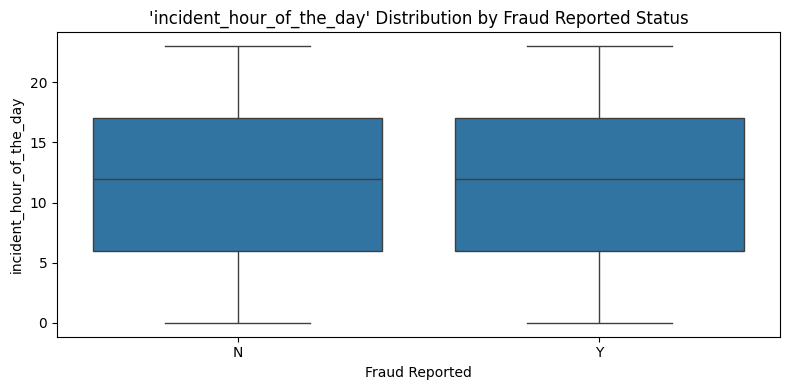

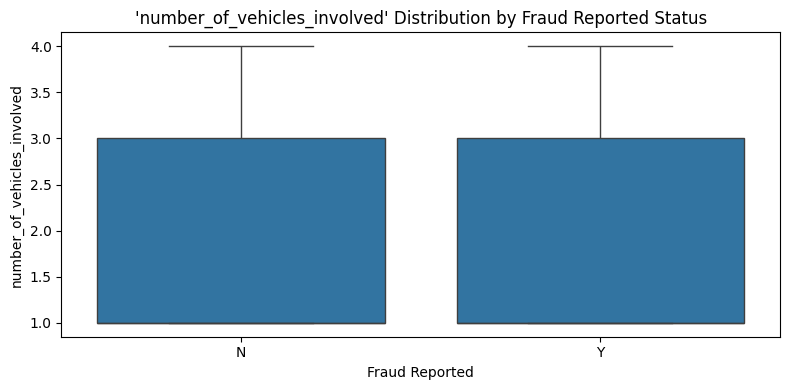

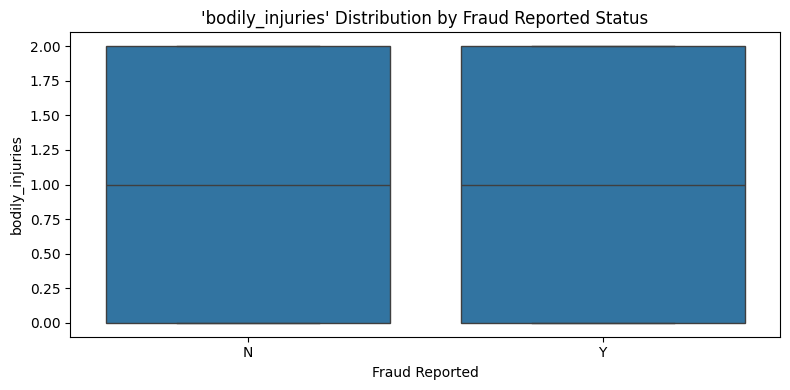

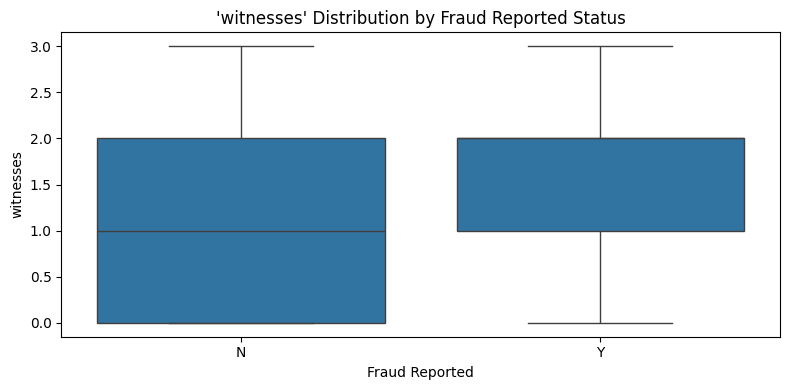

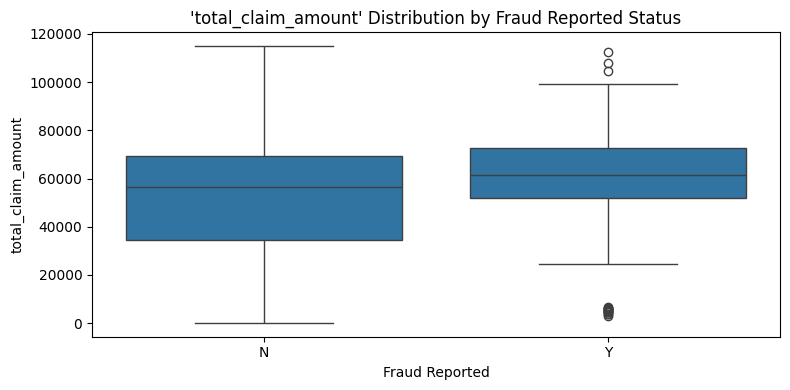

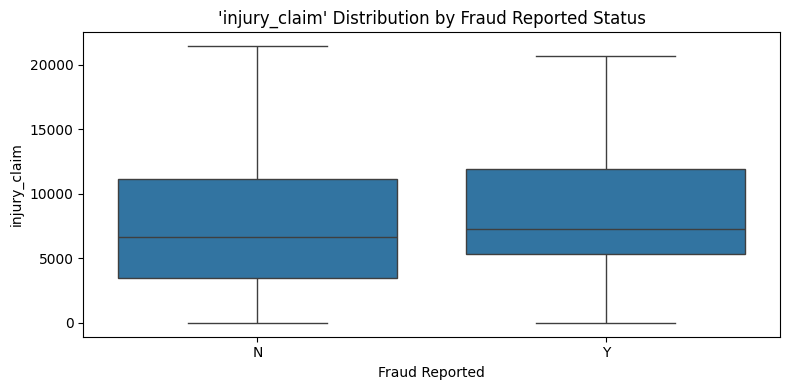

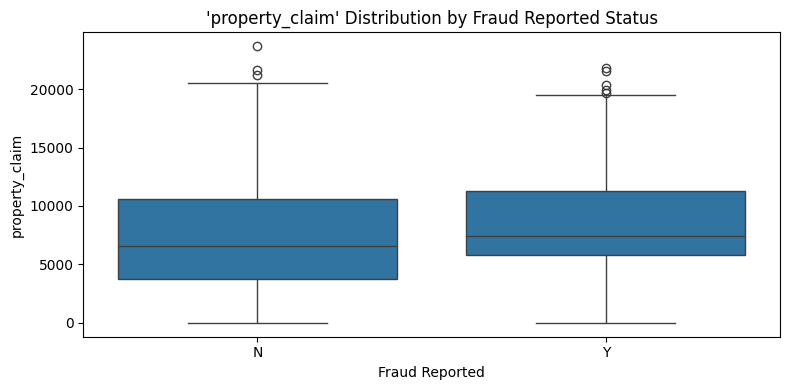

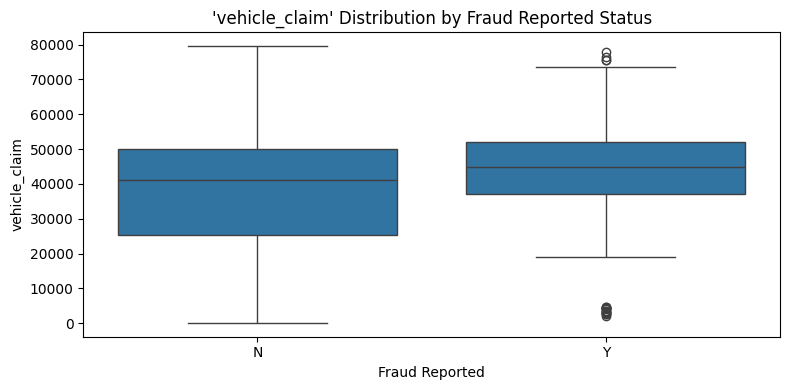

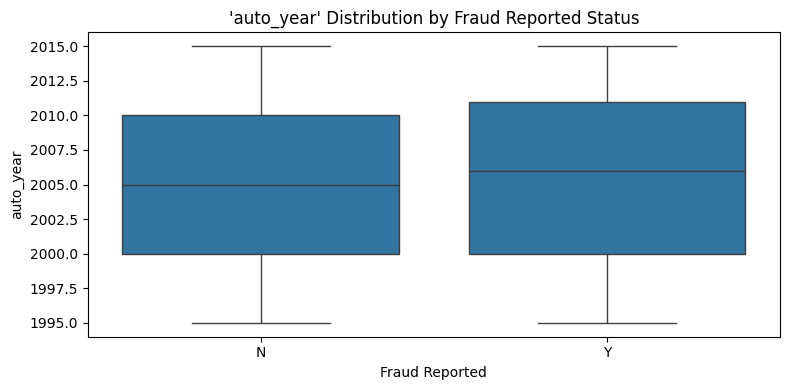

In [33]:
# Define numeric features you want to plot
numeric_features = dataset.select_dtypes(include=['number']).columns.tolist()

# Define the target grouping variable
group_var = 'fraud_reported'

# Loop over numeric features and plot boxplots grouped by fraud status
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=group_var, y=feature, data=dataset, order=['N', 'Y'])
    
    plt.title(f"'{feature}' Distribution by Fraud Reported Status")
    plt.xlabel("Fraud Reported")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

#### FIGURE 2.7 Modified scatterplot (page 45)

In [3]:
# Generate synthetic data
# Adjust data distribution to better match a U-shaped (parabolic) curve
np.random.seed(42)

# Generate miles driven values
x = np.linspace(500, 4000, 50)

# Create a U-shaped distribution for cost per mile (parabolic)
y_base = 1.0 + ((x - 2000) ** 2) / 3e6  # Parabolic shape with a minimum around 2000 miles

# Add some random noise
cost_per_mile = y_base + np.random.uniform(-0.2, 0.2, len(x))

# Determine colors based on threshold
colors = ['orange' if c > 1.5 else 'gray' for c in cost_per_mile]

avg_cost = cost_per_mile.mean()

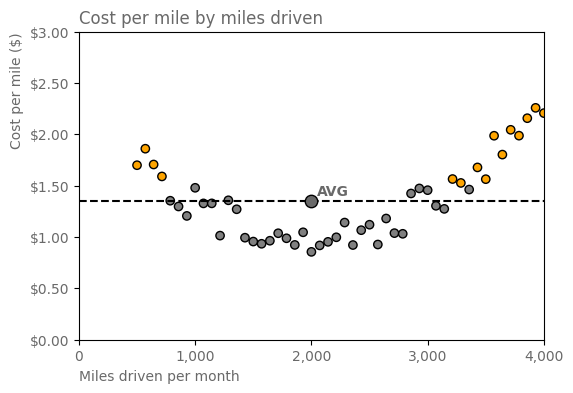

In [4]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, cost_per_mile, c=colors, edgecolors='black')

# Add the average cost per mile line
plt.axhline(avg_cost, color='black', linestyle='dashed')

# Add the "AVG" point as a dark gray dot
plt.scatter([2000], [avg_cost], color='dimgray', s=80, edgecolors='black', zorder=3)
plt.text(2050, avg_cost + 0.05, "AVG", fontsize=10, fontweight='bold', color='dimgray')

# Labels with dark gray color
plt.xlabel("Miles driven per month", color='dimgray', loc='left')
plt.ylabel("Cost per mile ($)", color='dimgray', loc='top')
plt.title("Cost per mile by miles driven", color='dimgray', loc='left')

# Formatting
plt.xticks([0, 1000, 2000, 3000, 4000], labels=['0', '1,000', '2,000', '3,000', '4,000'], color='dimgray')
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], labels=["$0.00", "$0.50", "$1.00", "$1.50", "$2.00", "$2.50", "$3.00"], color='dimgray')
plt.xlim(0, 4000)
plt.ylim(0, 3)

# Show plot
plt.show()
